<a href="https://colab.research.google.com/github/sourit123/Sourit-Khamaru/blob/main/Statewise_cars_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer
from yellowbrick.cluster import KElbowVisualizer


In [ ]:
#loading the data
data = pd.read_csv('RTYB201920_A3_3c_0.csv')

In [ ]:
# Find the shape
print("Shape of the dataset:", data.shape)

Shape of the dataset: (37, 17)


In [ ]:
# Finding null values
print("Null values in the dataset:")
print(data.isnull().sum())

Null values in the dataset:
States/Union Territories                                        0
Multiaxled/Articulated Vehicles (I)                             1
Trucks and Lorries (II)                                         1
Light Motor Vehicles (Goods) (II) - Four Wheelers               1
Light Motor Vehicles (Goods) (II) - Three Wheelers              1
Buses (IV) - Stage carriages                                    1
Buses (IV) - Contract carriages                                 2
Buses (IV) - Private service vehicles                           2
Buses (IV) - Other buses                                        2
Taxis (V) - Motor cabs                                          1
Taxis (V) - Maxi cabs                                           2
Taxis (V) - Other taxis                                         2
Light Motor Vehicles (Passengers) (VI) - Three seaters          1
Light Motor Vehicles (Passengers) (VI) - Four to six seaters    1
Motor cycles on hire (VII)                      

In [ ]:
# Dropping 'States/Union Territories' column
data.drop('States/Union Territories', axis=1, inplace=True)

# Convert column names to list
columns_list = data.columns.tolist()


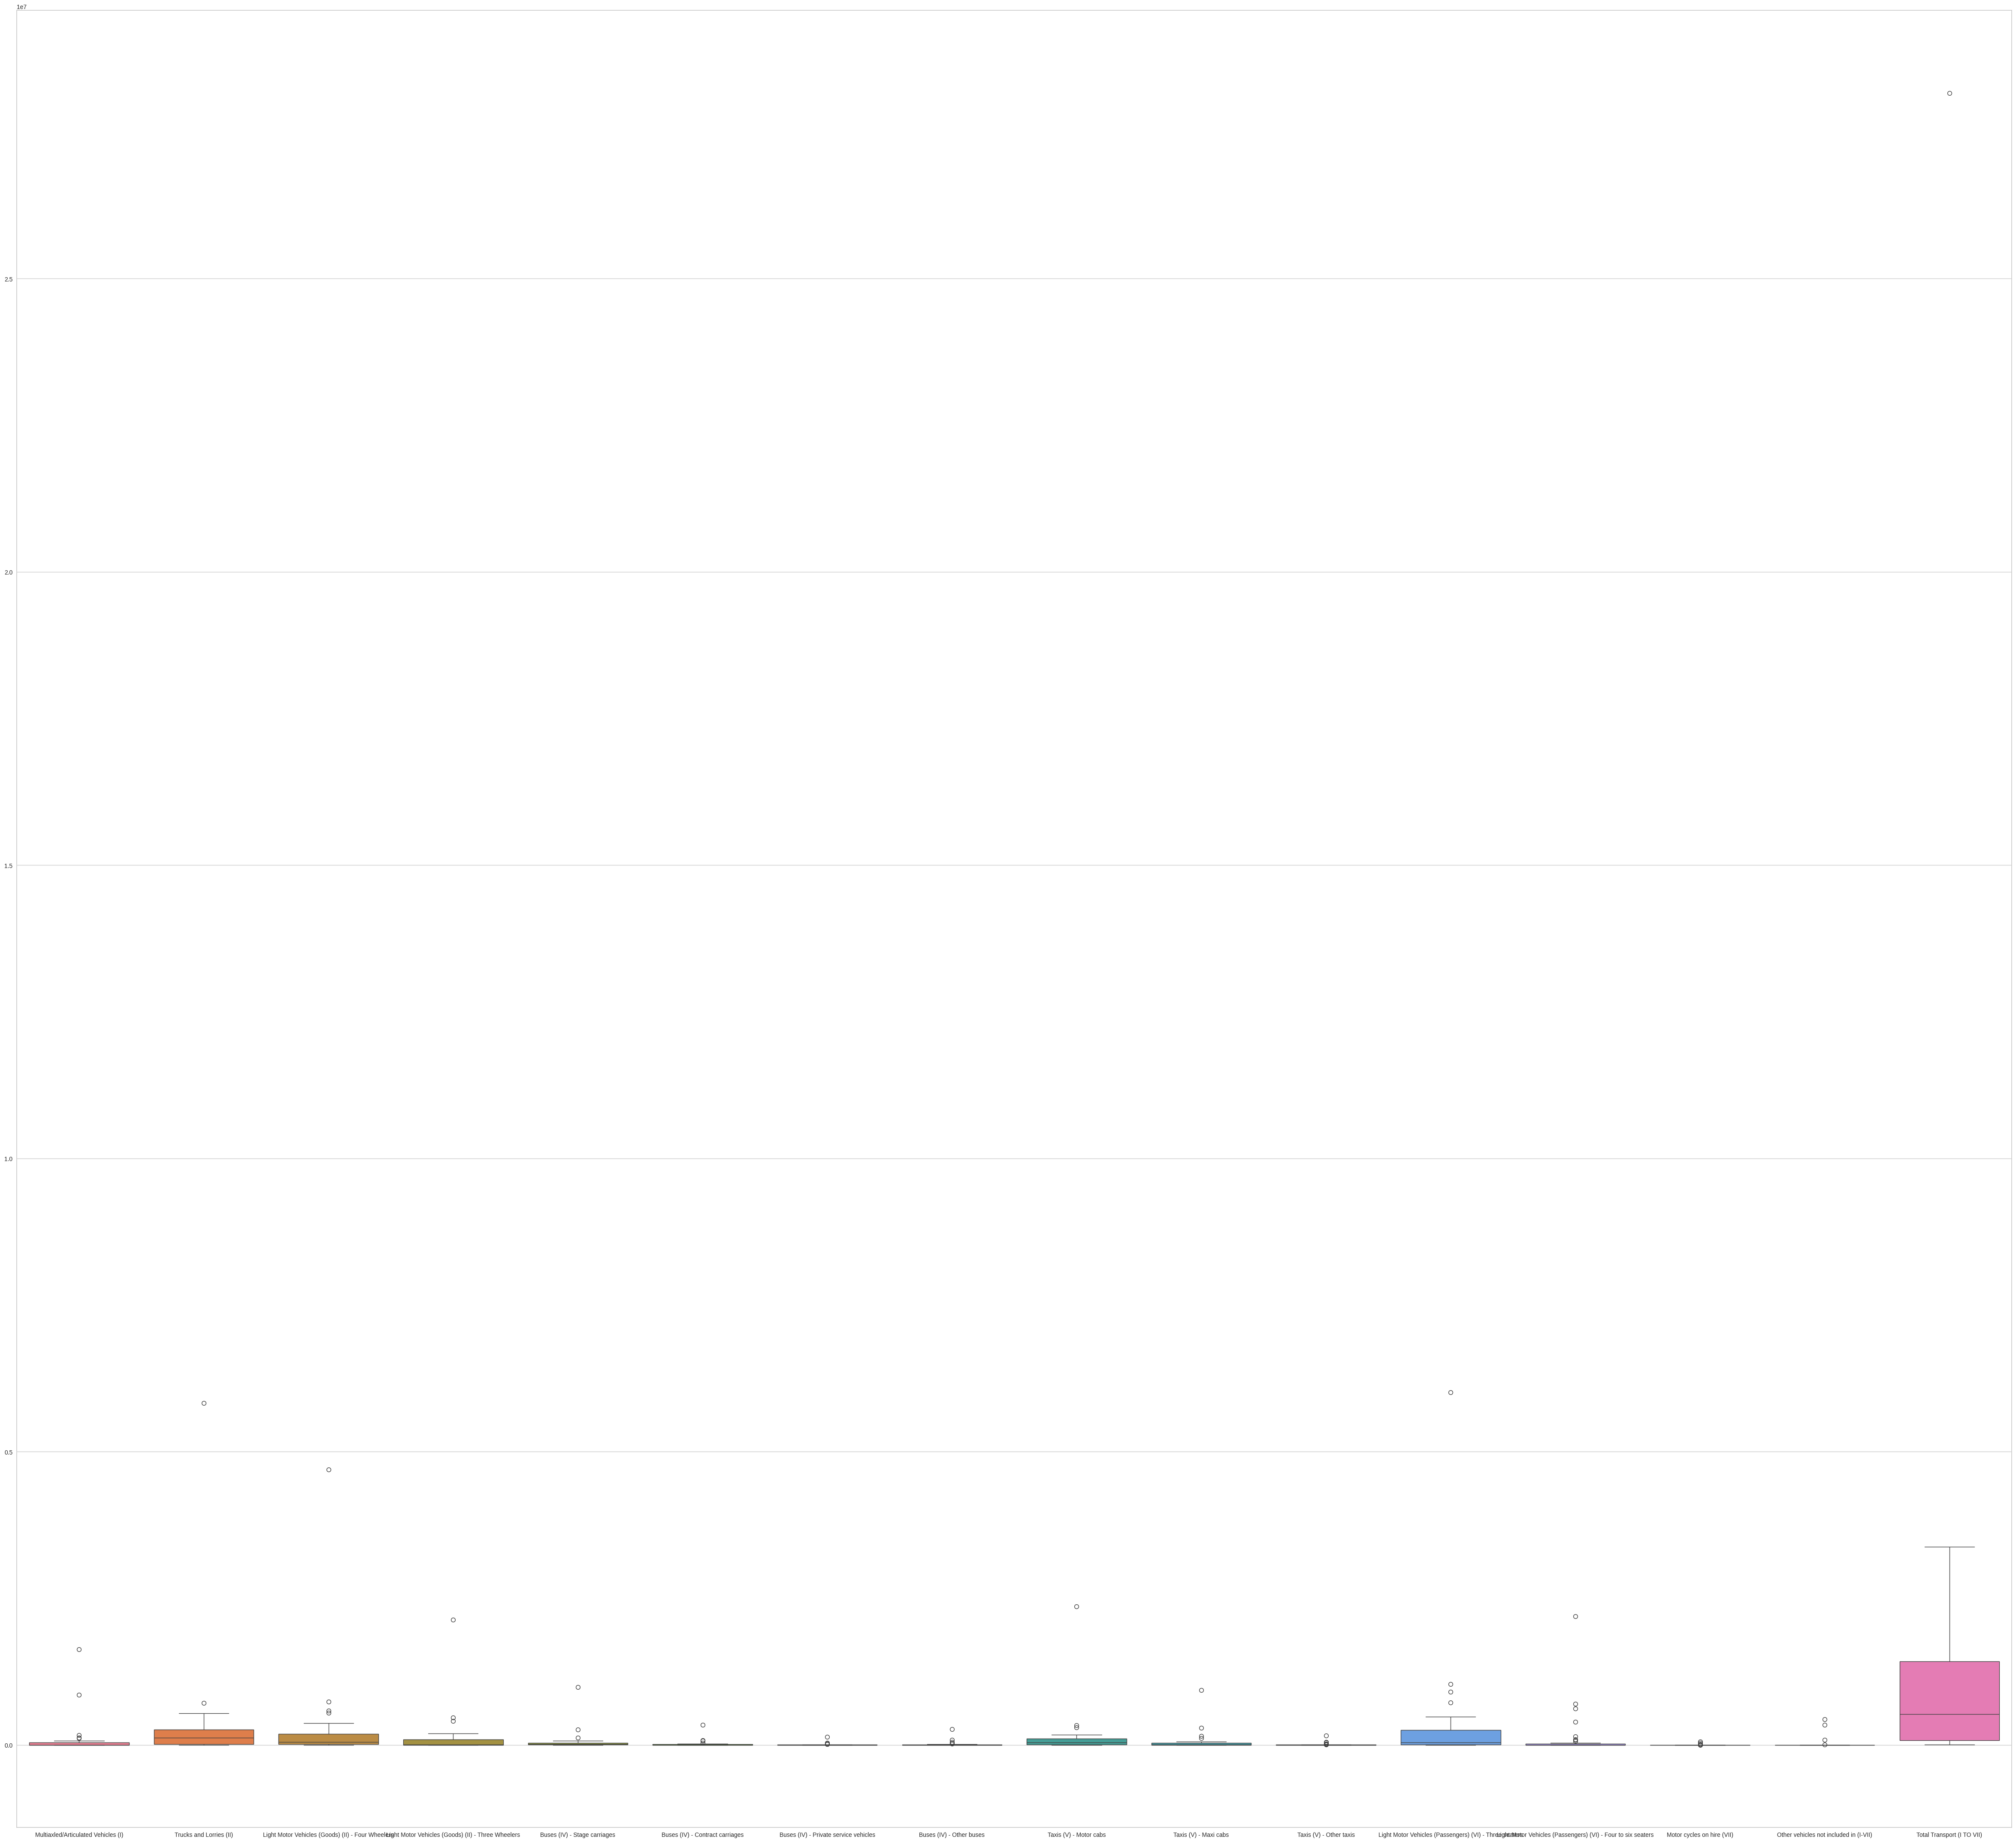

In [ ]:
# Outlier detection and elimination using box plot
plt.figure(figsize=(60,55))
for i in range(0, len(columns_list), 16):
    sns.boxplot(data=data[columns_list[i:i+16]])
    plt.show()

In [ ]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data)


In [ ]:
# Perform PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)
pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_


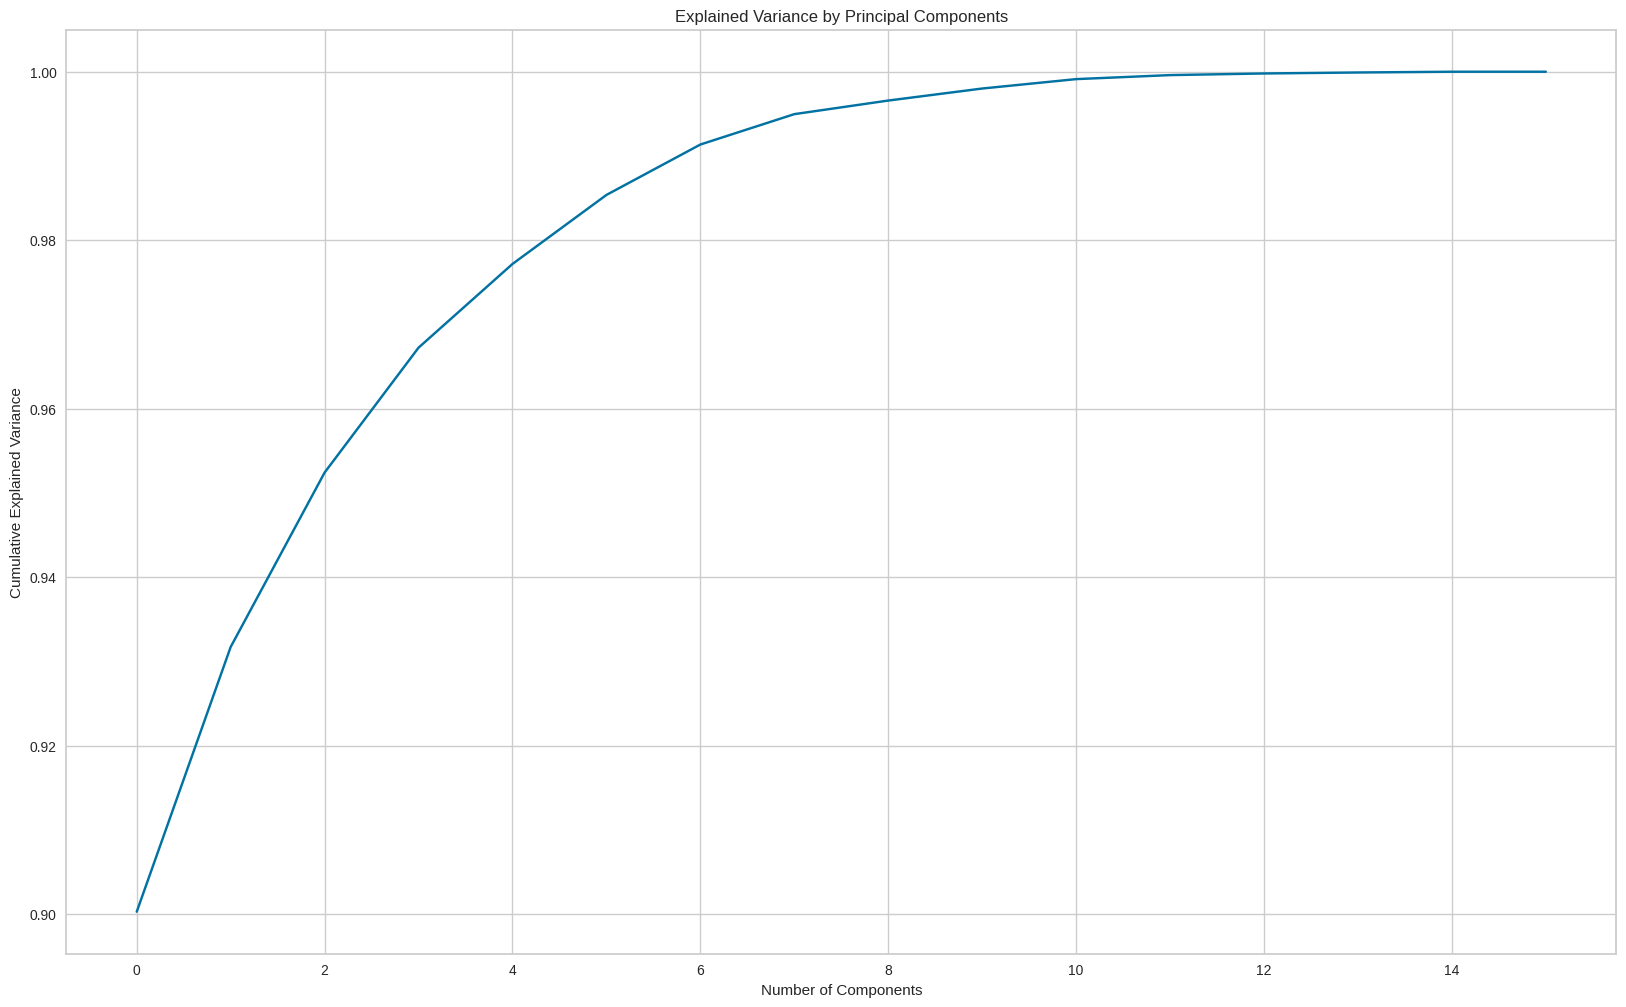

In [ ]:
# Plot explained variance
plt.figure(figsize=(20,12))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [ ]:
# Performing PCA with selected components
pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_data)


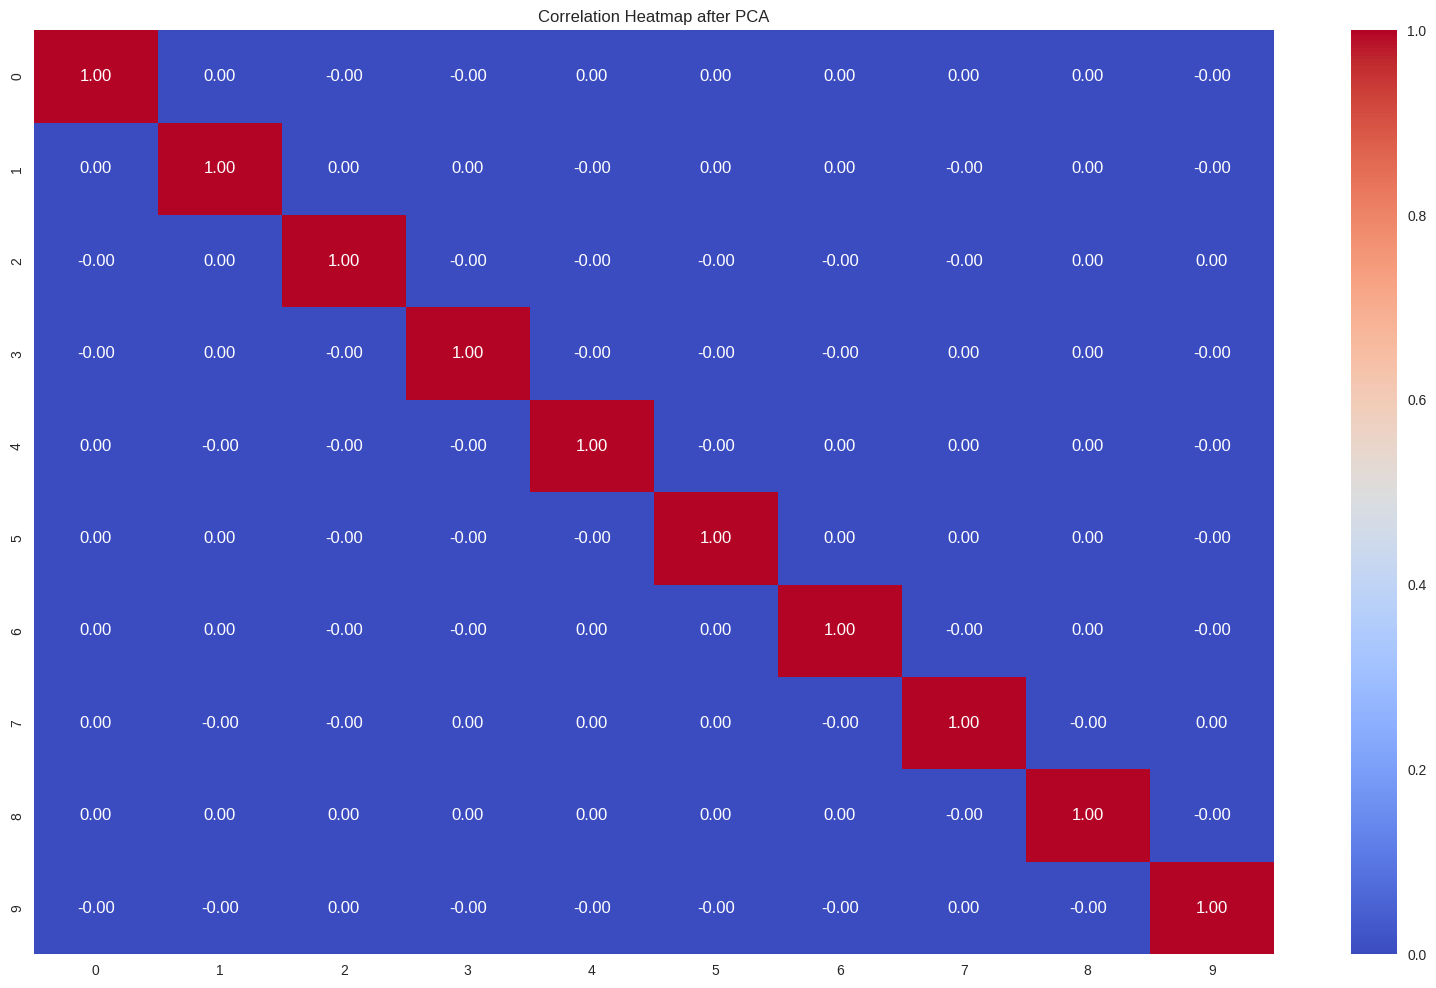

In [ ]:
# Heatmap after PCA
plt.figure(figsize=(20, 12))
sns.heatmap(pd.DataFrame(pca_data).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap after PCA')
plt.show()

In [ ]:
# Convert array to dataframe
pca_df = pd.DataFrame(pca_data)

# Calculate Within-Cluster Sum of Squares (WCSS) for each cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

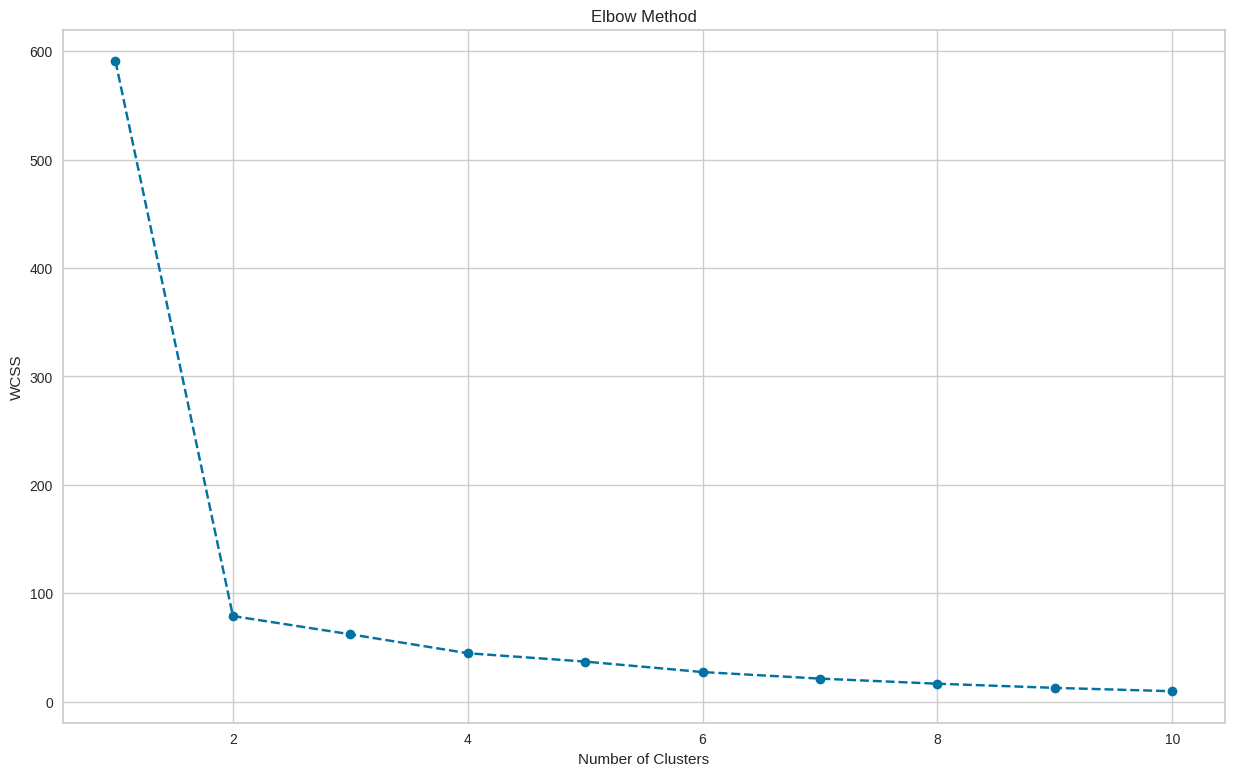

In [ ]:
# Elbow curve
plt.figure(figsize=(15, 9))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# KMeans model fit
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
# Find labels
labels = kmeans.labels_

# Find inertia and silhouette score
inertia = kmeans.inertia_
silhouette = silhouette_score(pca_df, labels)
print("Inertia:", inertia)
print("Silhouette Score:", silhouette)


Inertia: 44.73279788137647
Silhouette Score: 0.4615519407194337


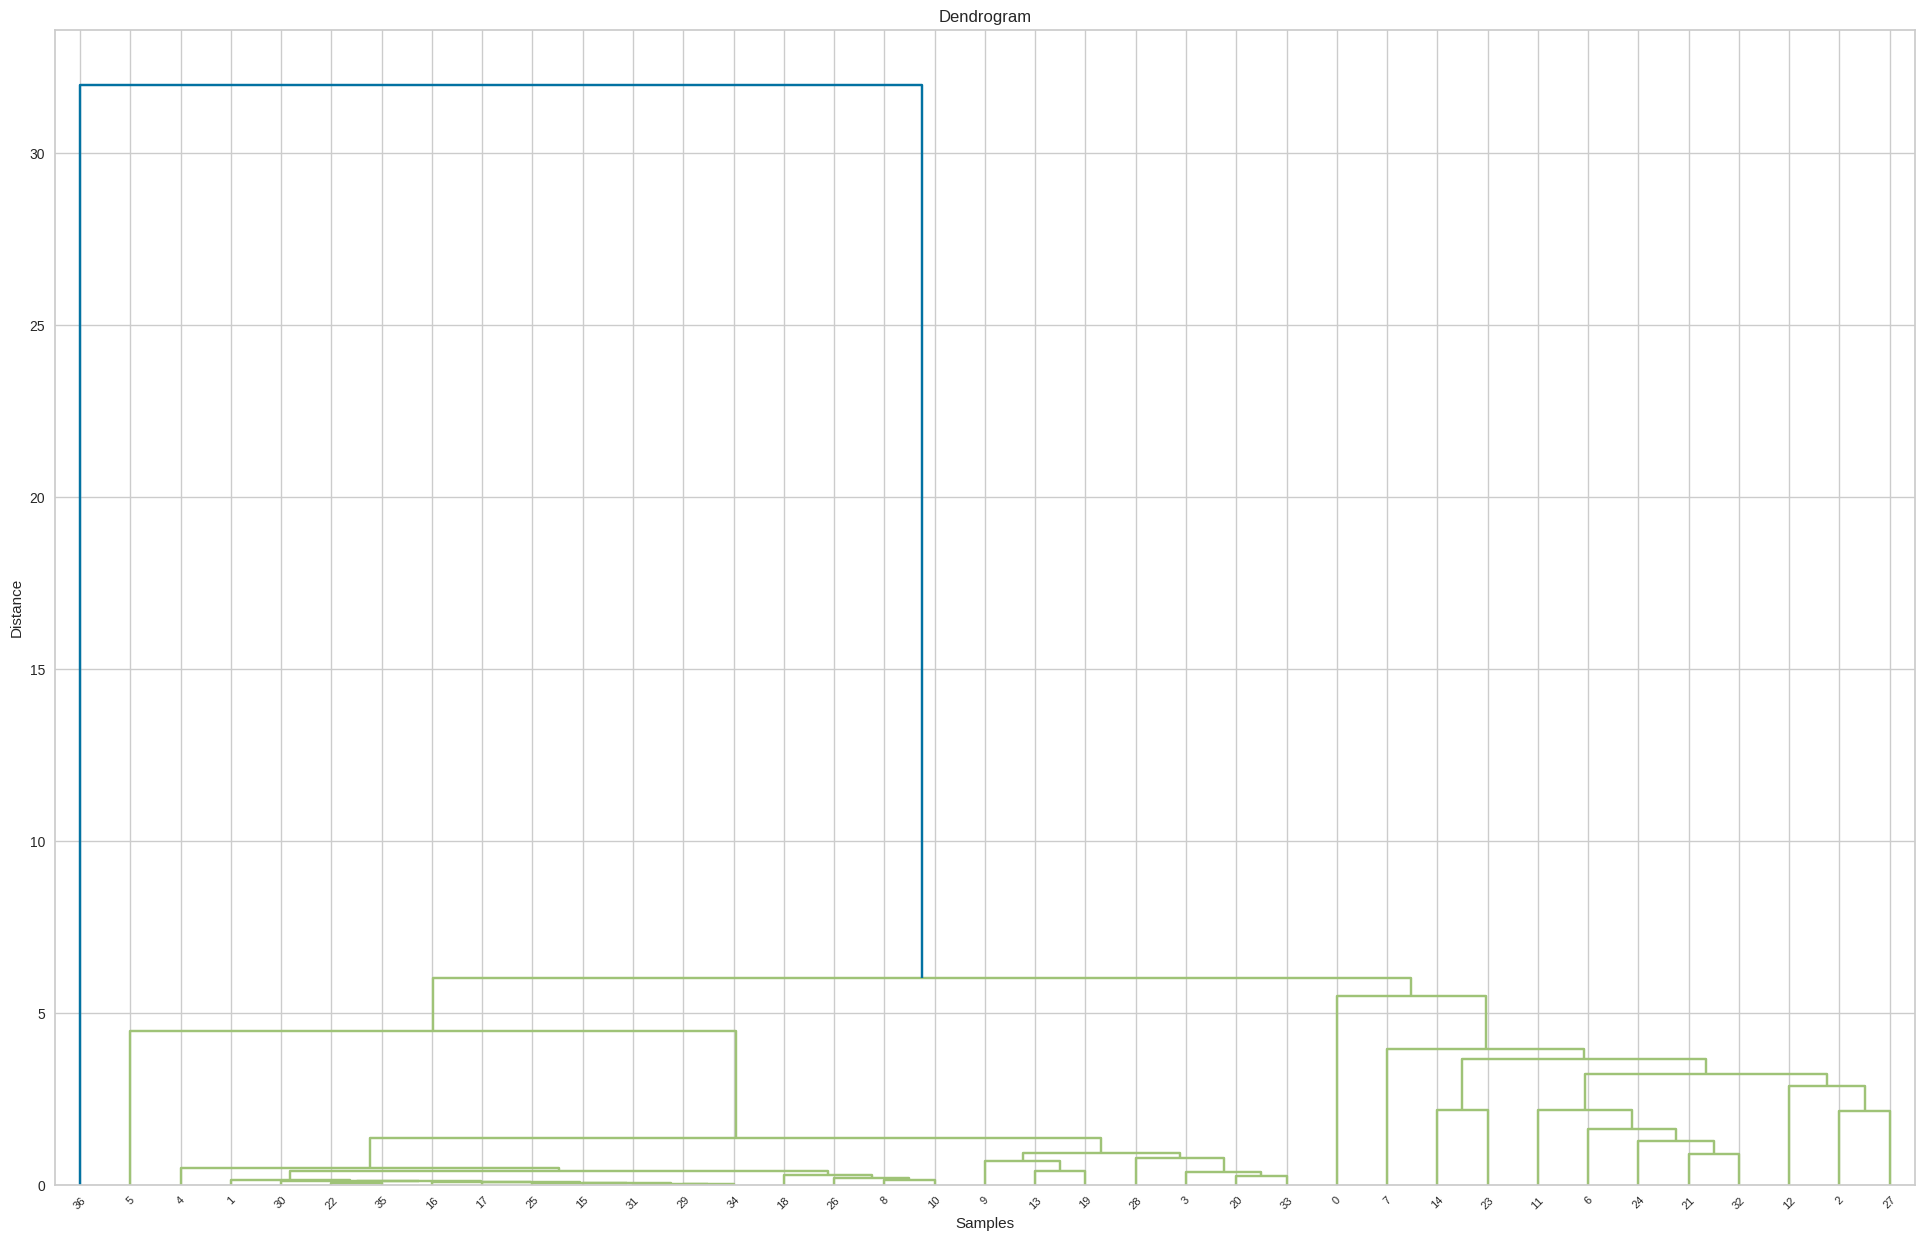

In [ ]:
# Dendrogram for Agglomerative clustering
plt.figure(figsize=(24,15))
dendrogram(linkage(pca_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering model
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(pca_df)


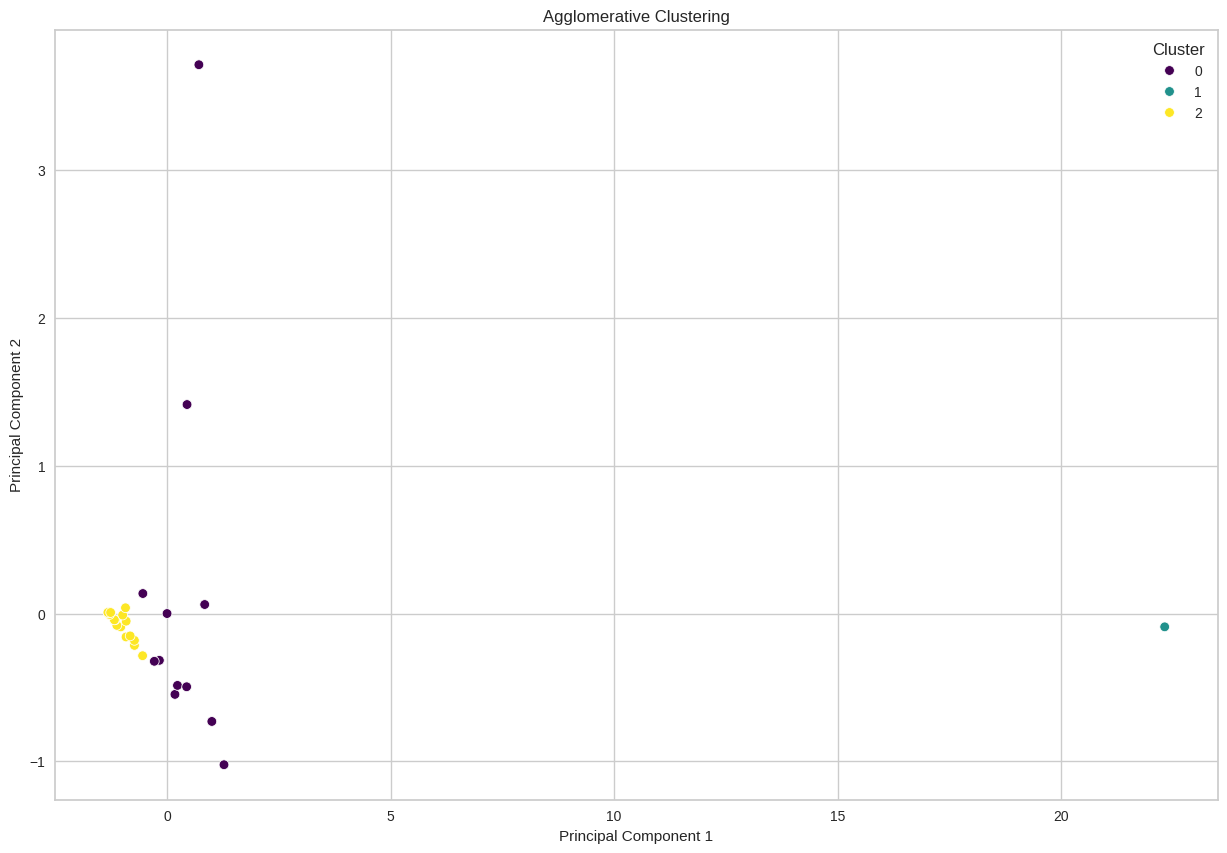

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['agglomerative_labels'] = agglomerative.fit_predict(scaled_data)

# Visualizing the clusters
plt.figure(figsize=(15, 10))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data['agglomerative_labels'], palette='viridis', legend='full')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()




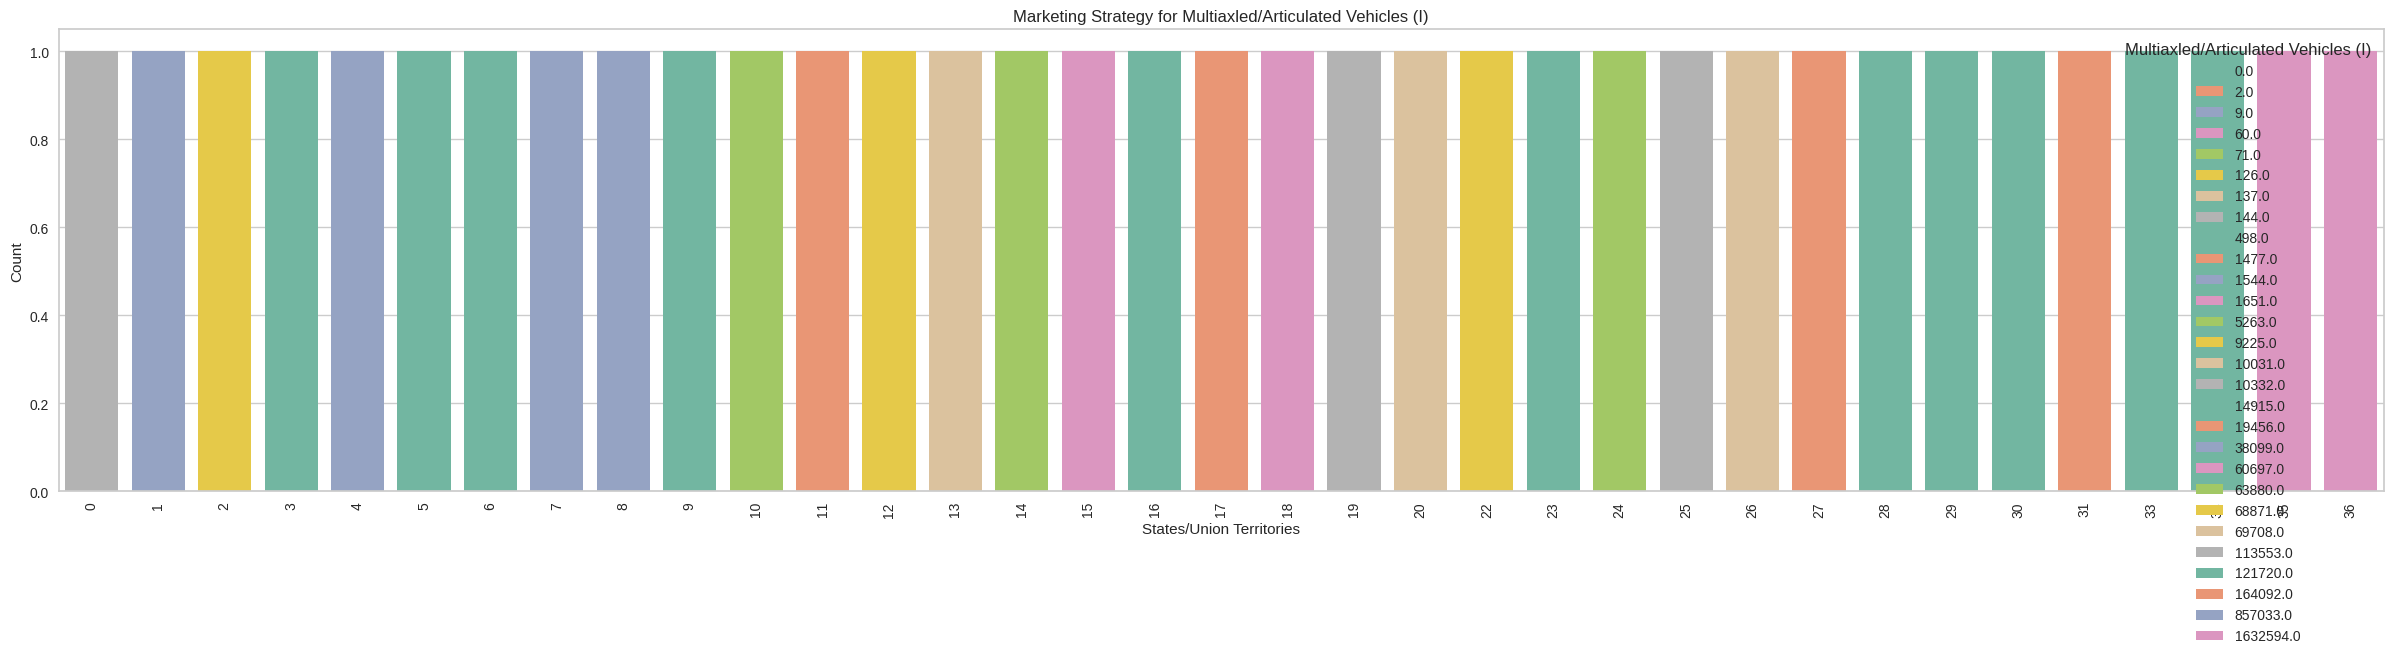

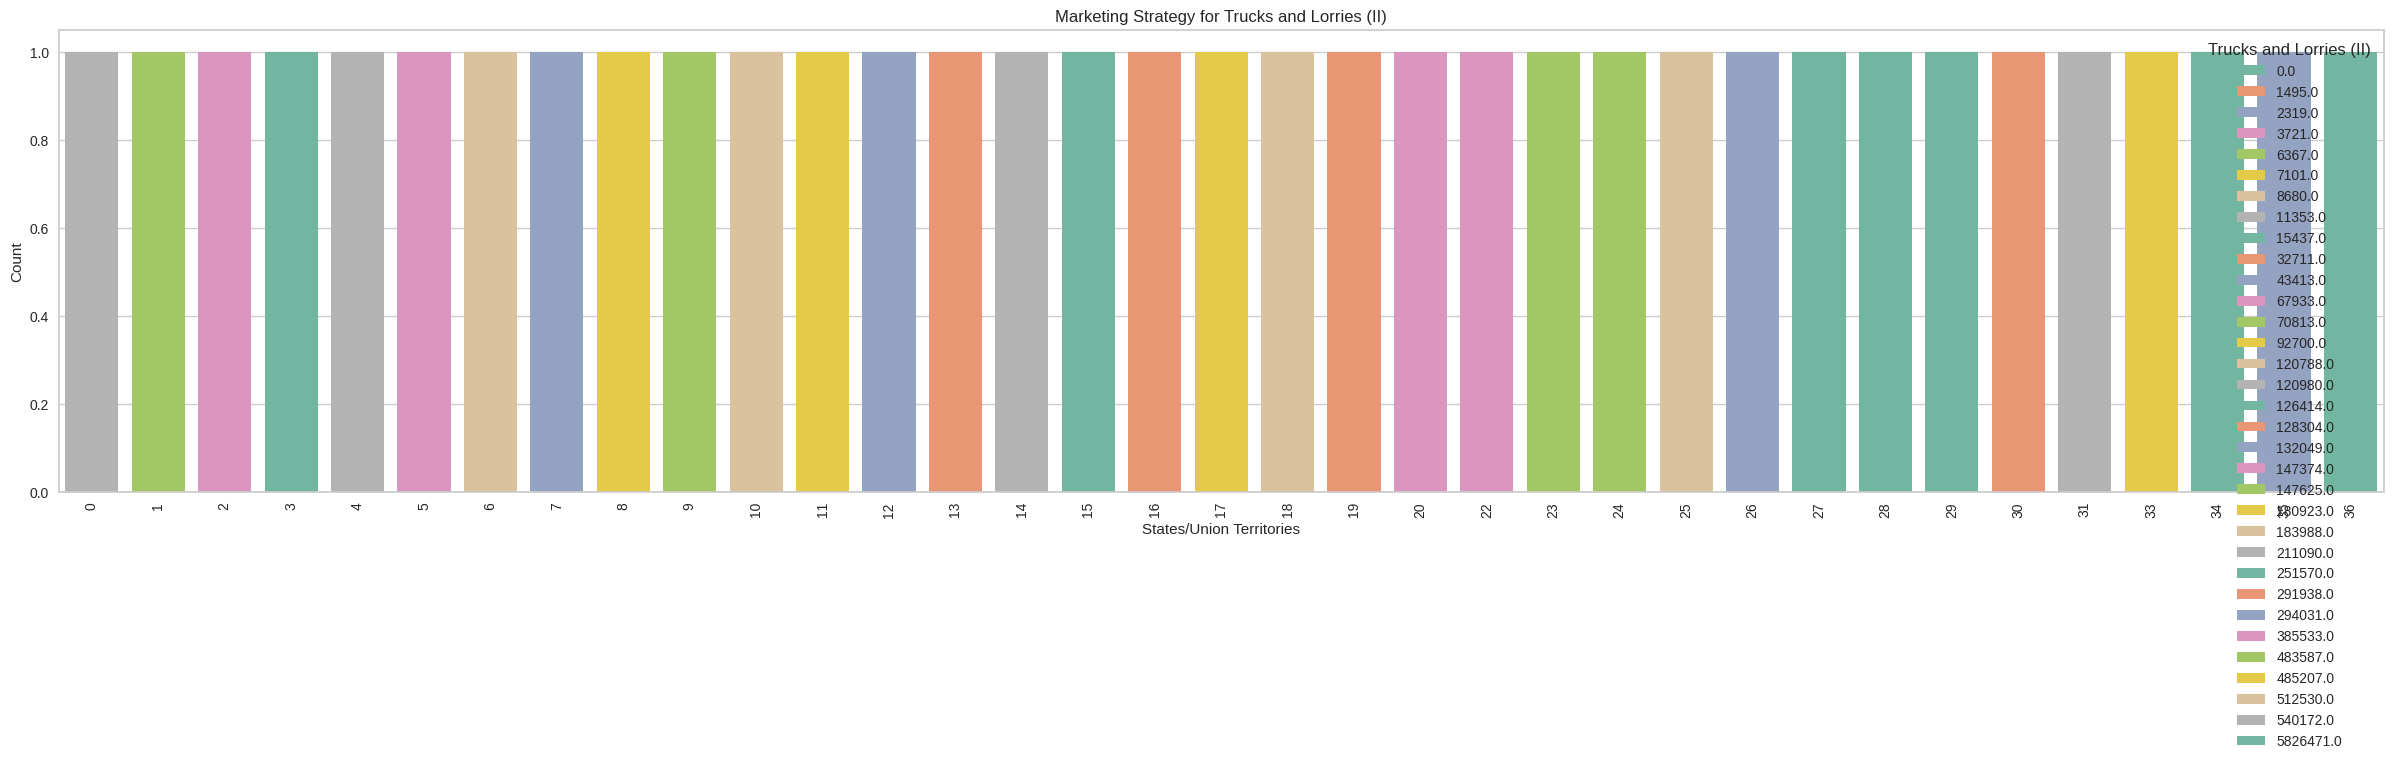

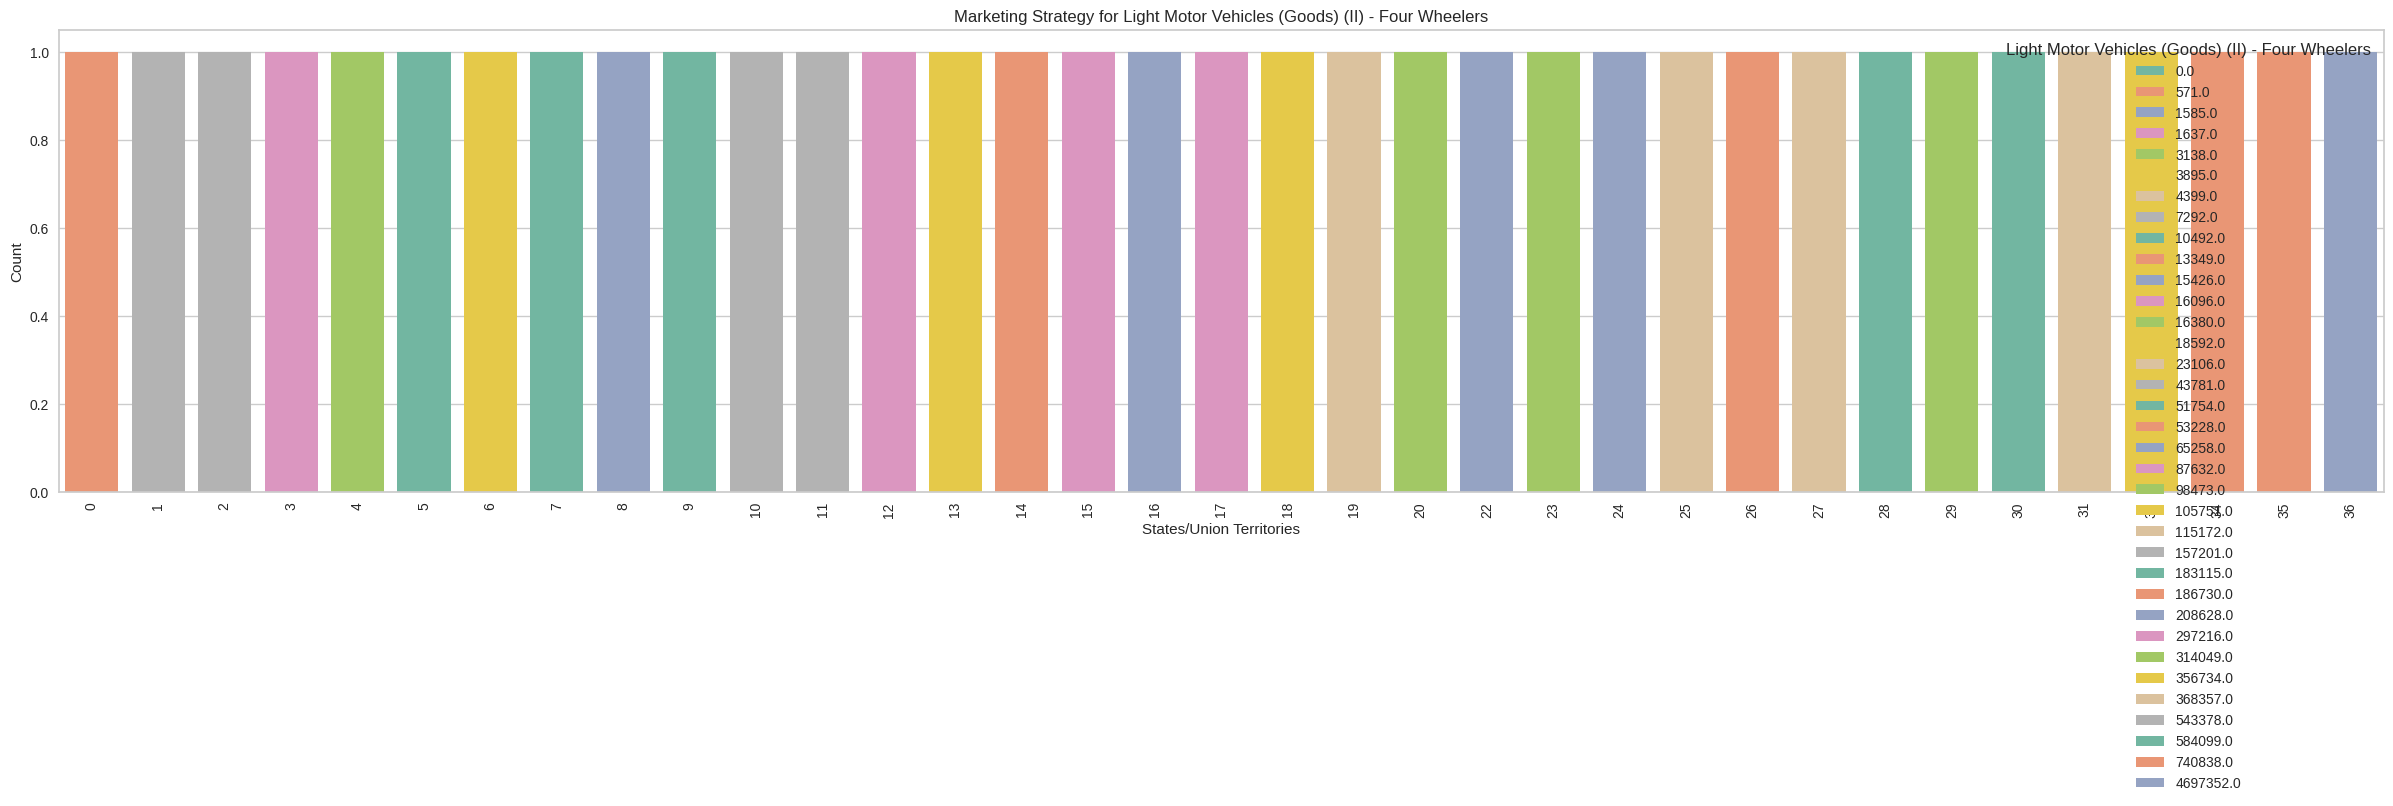

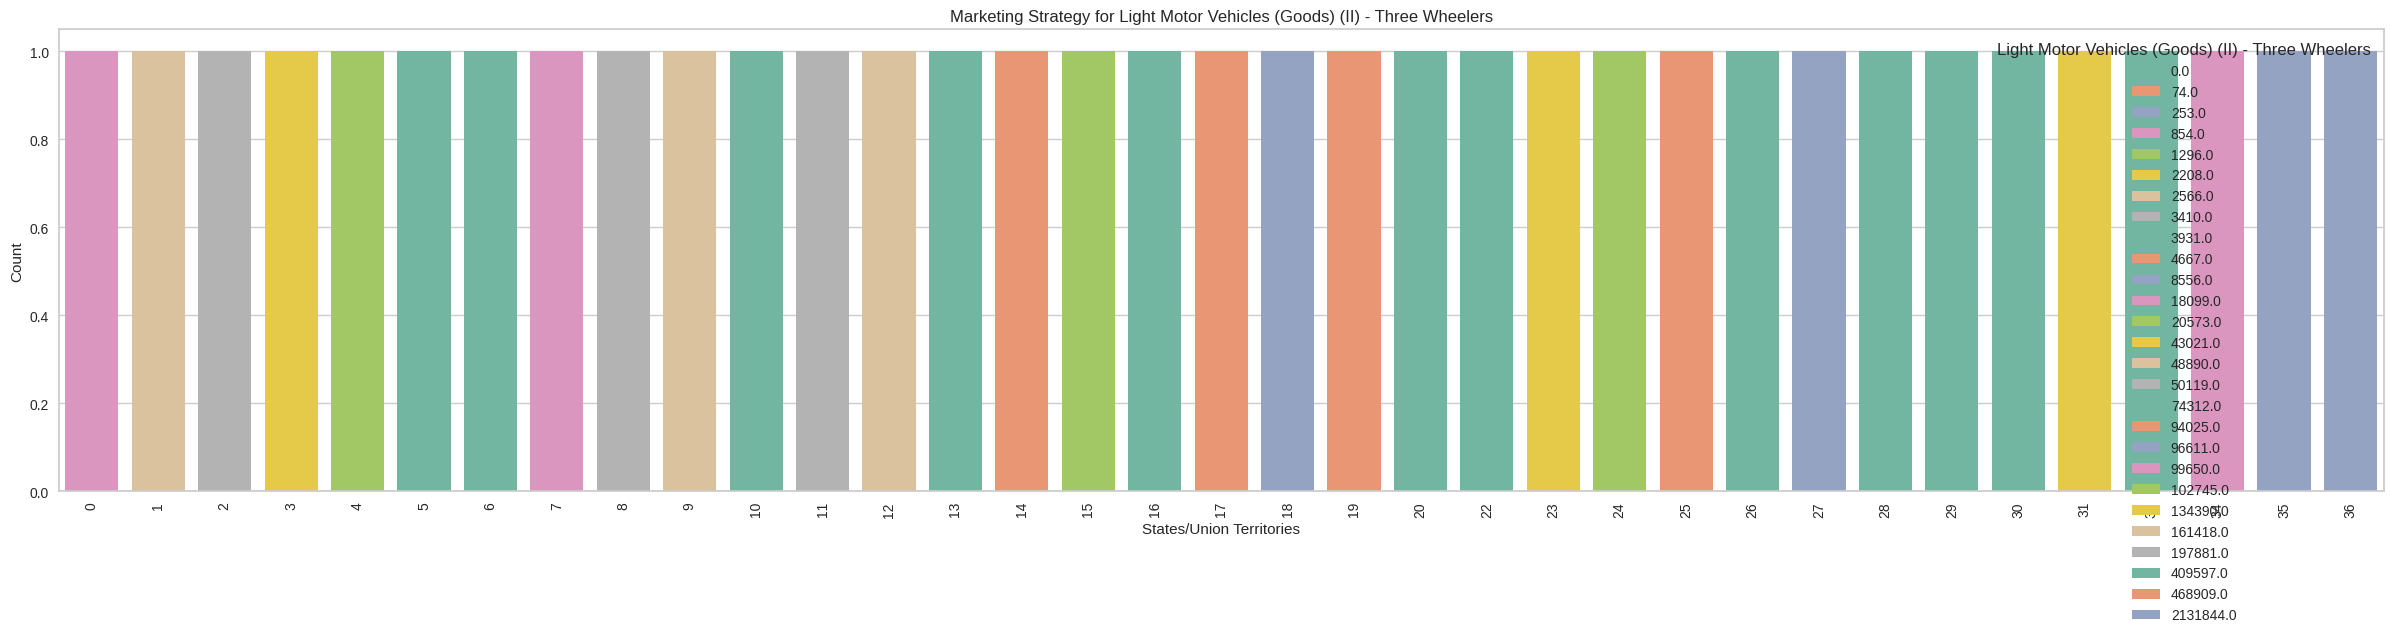

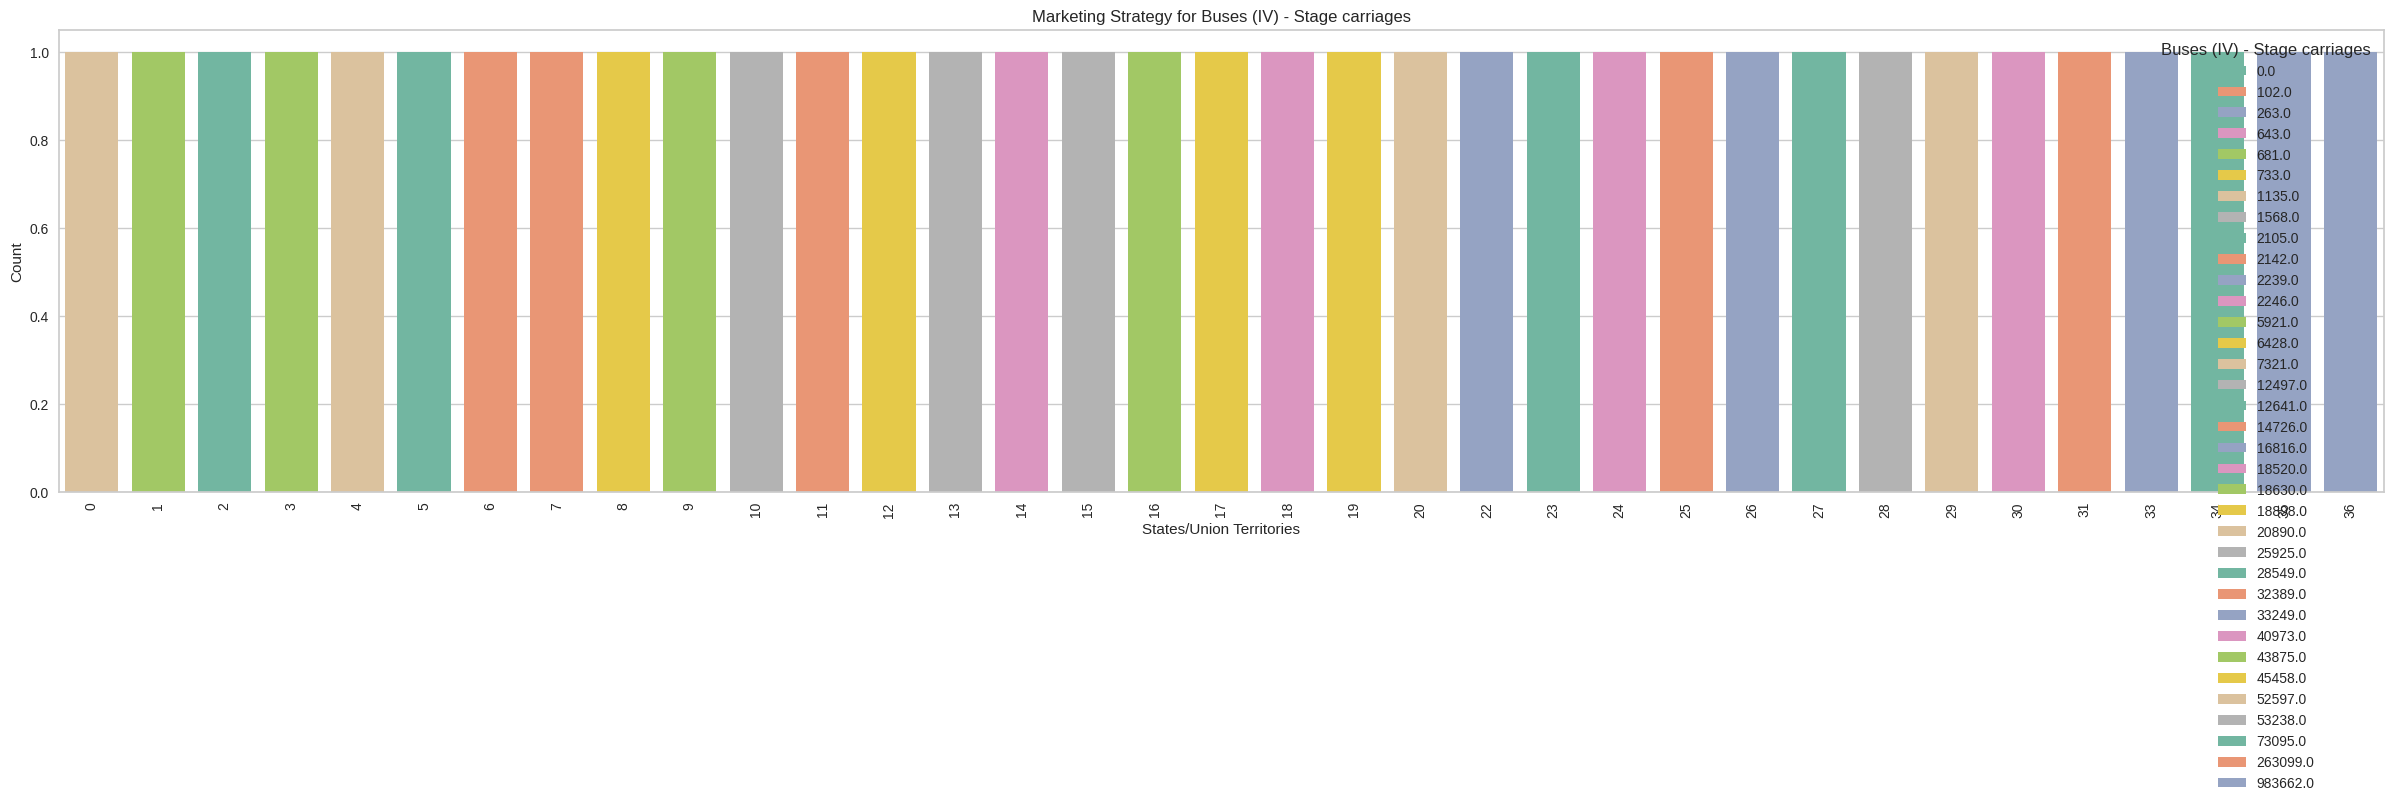

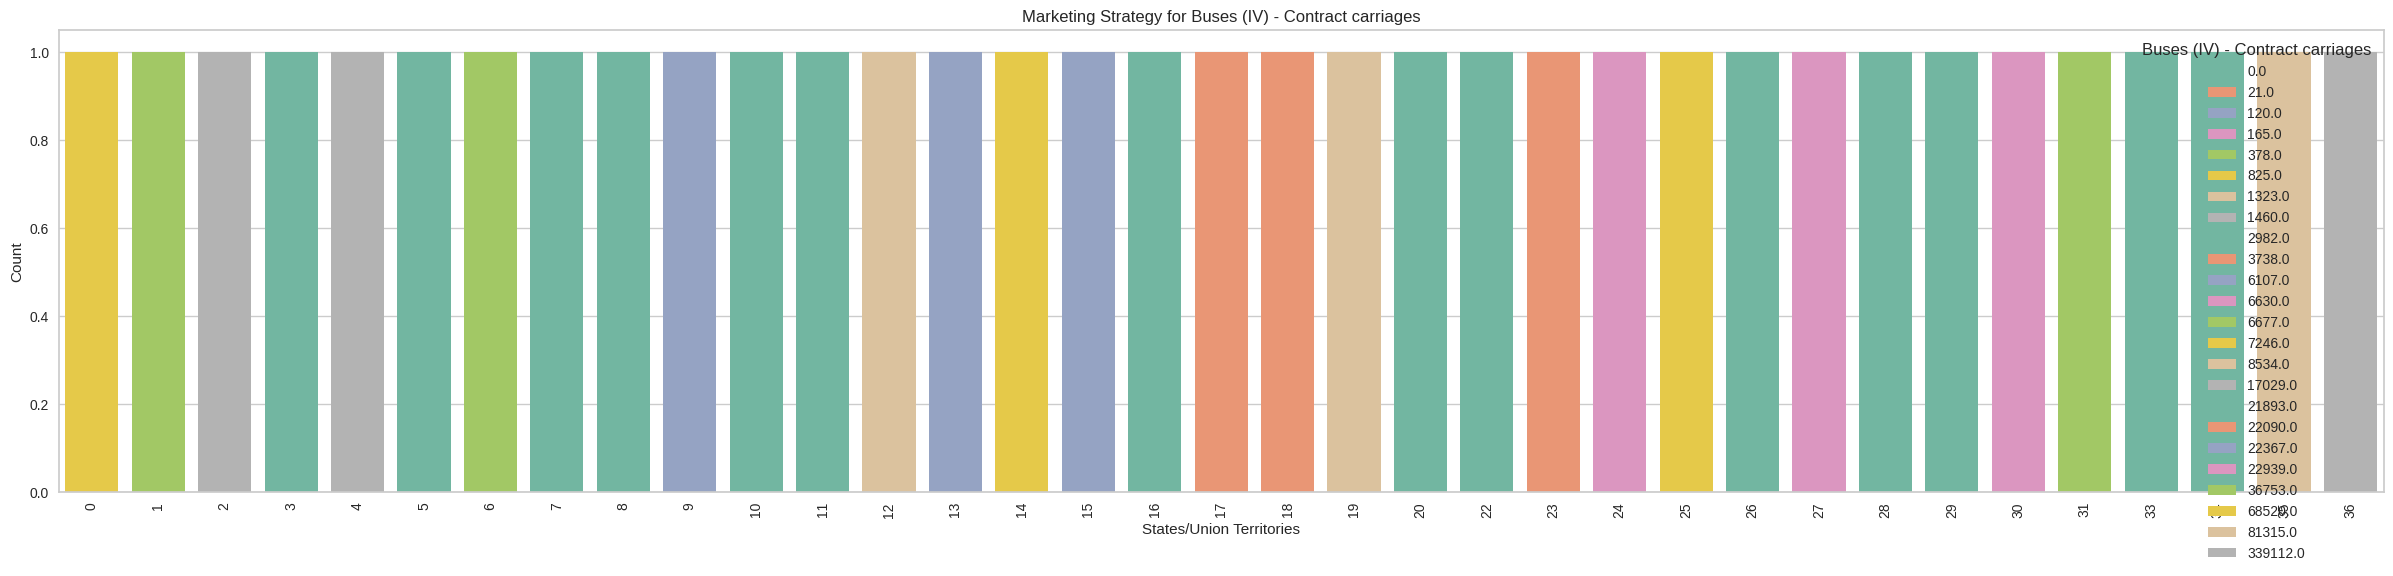

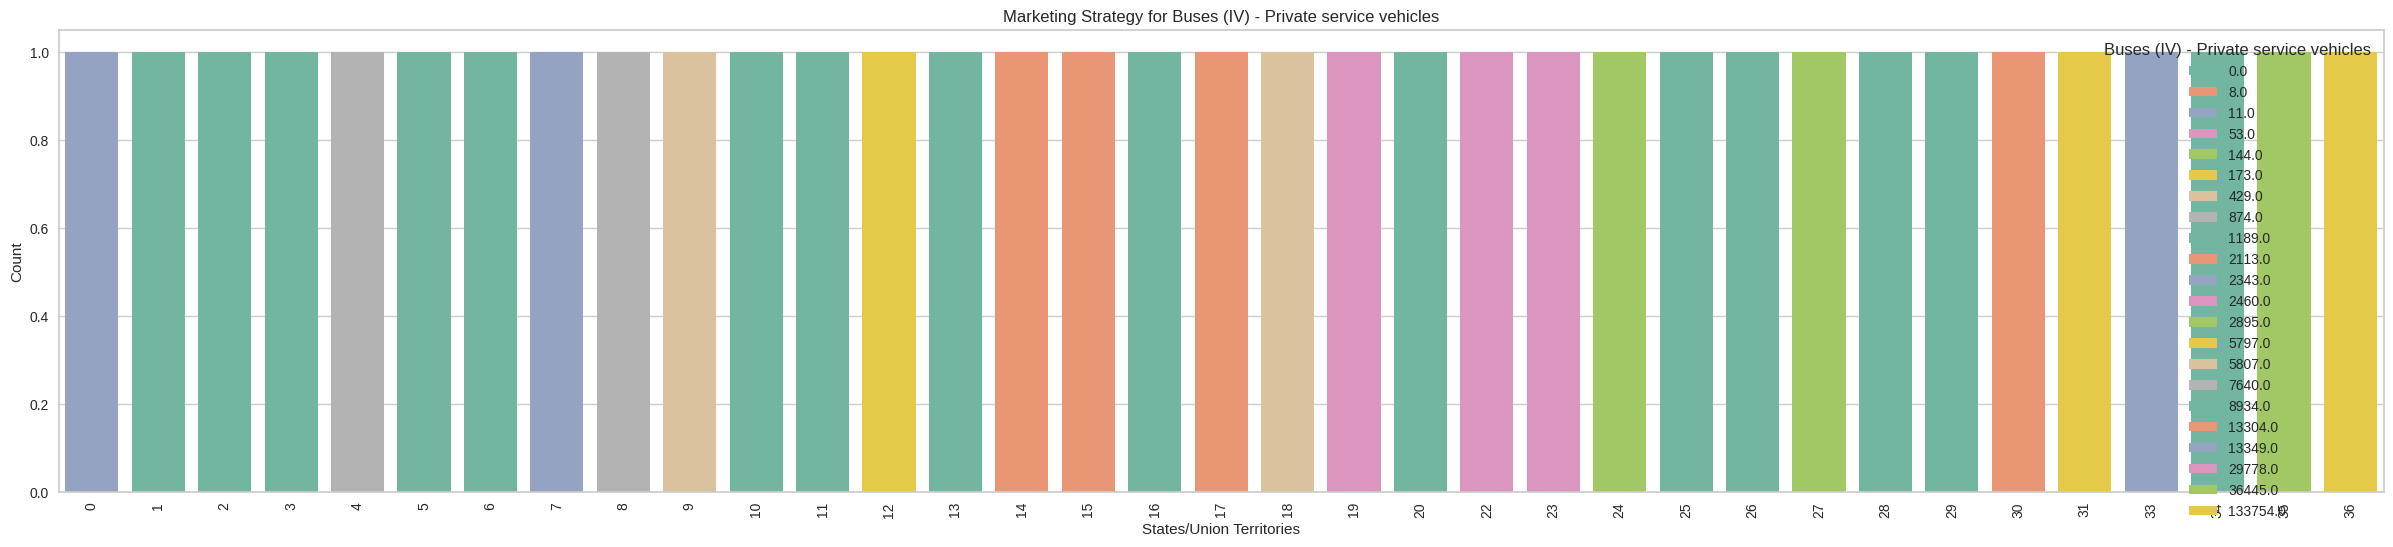

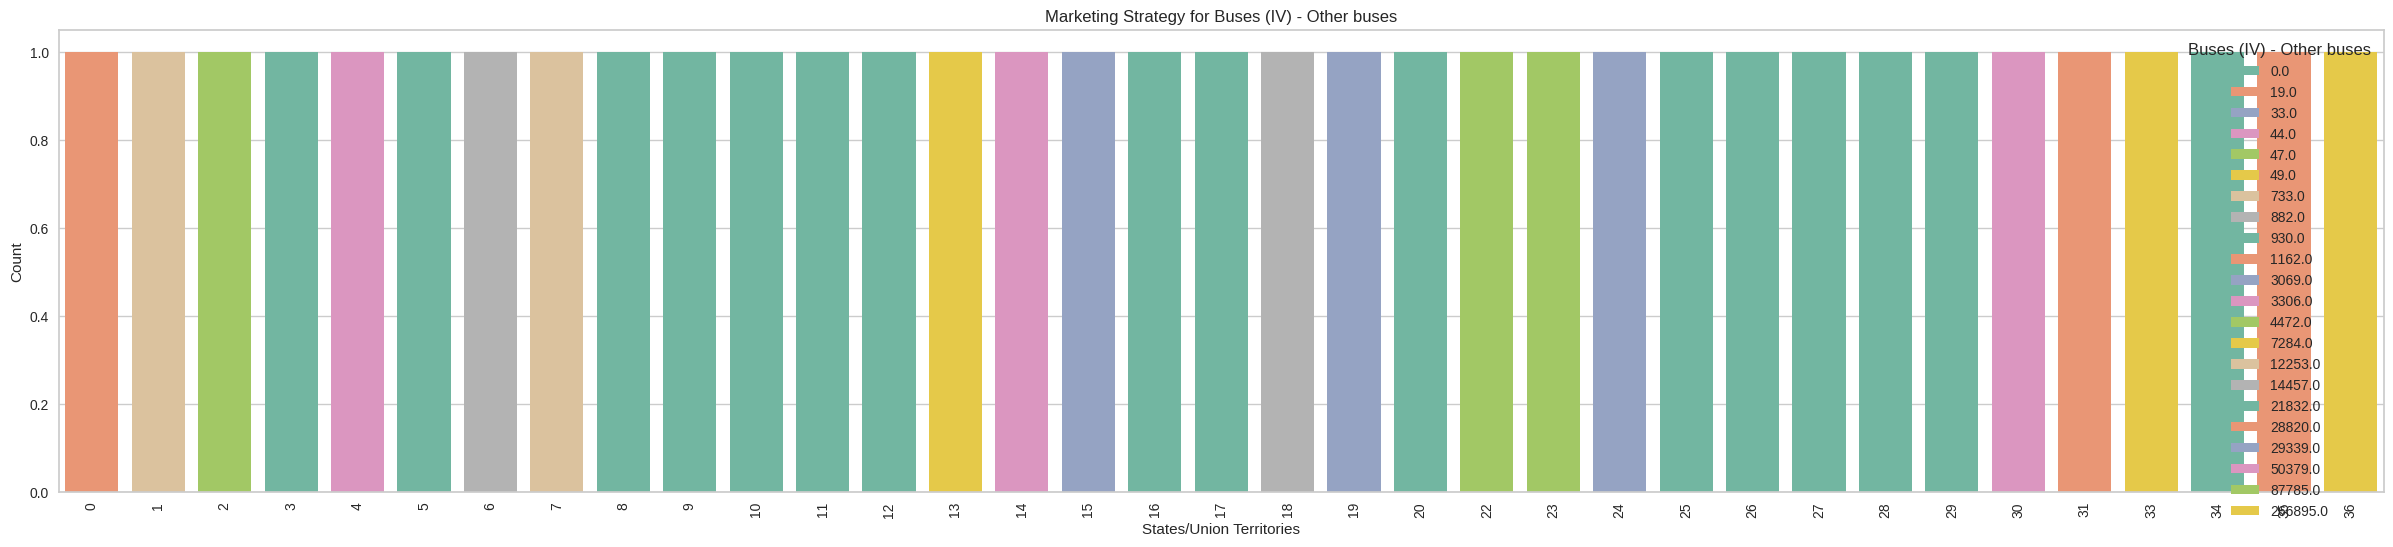

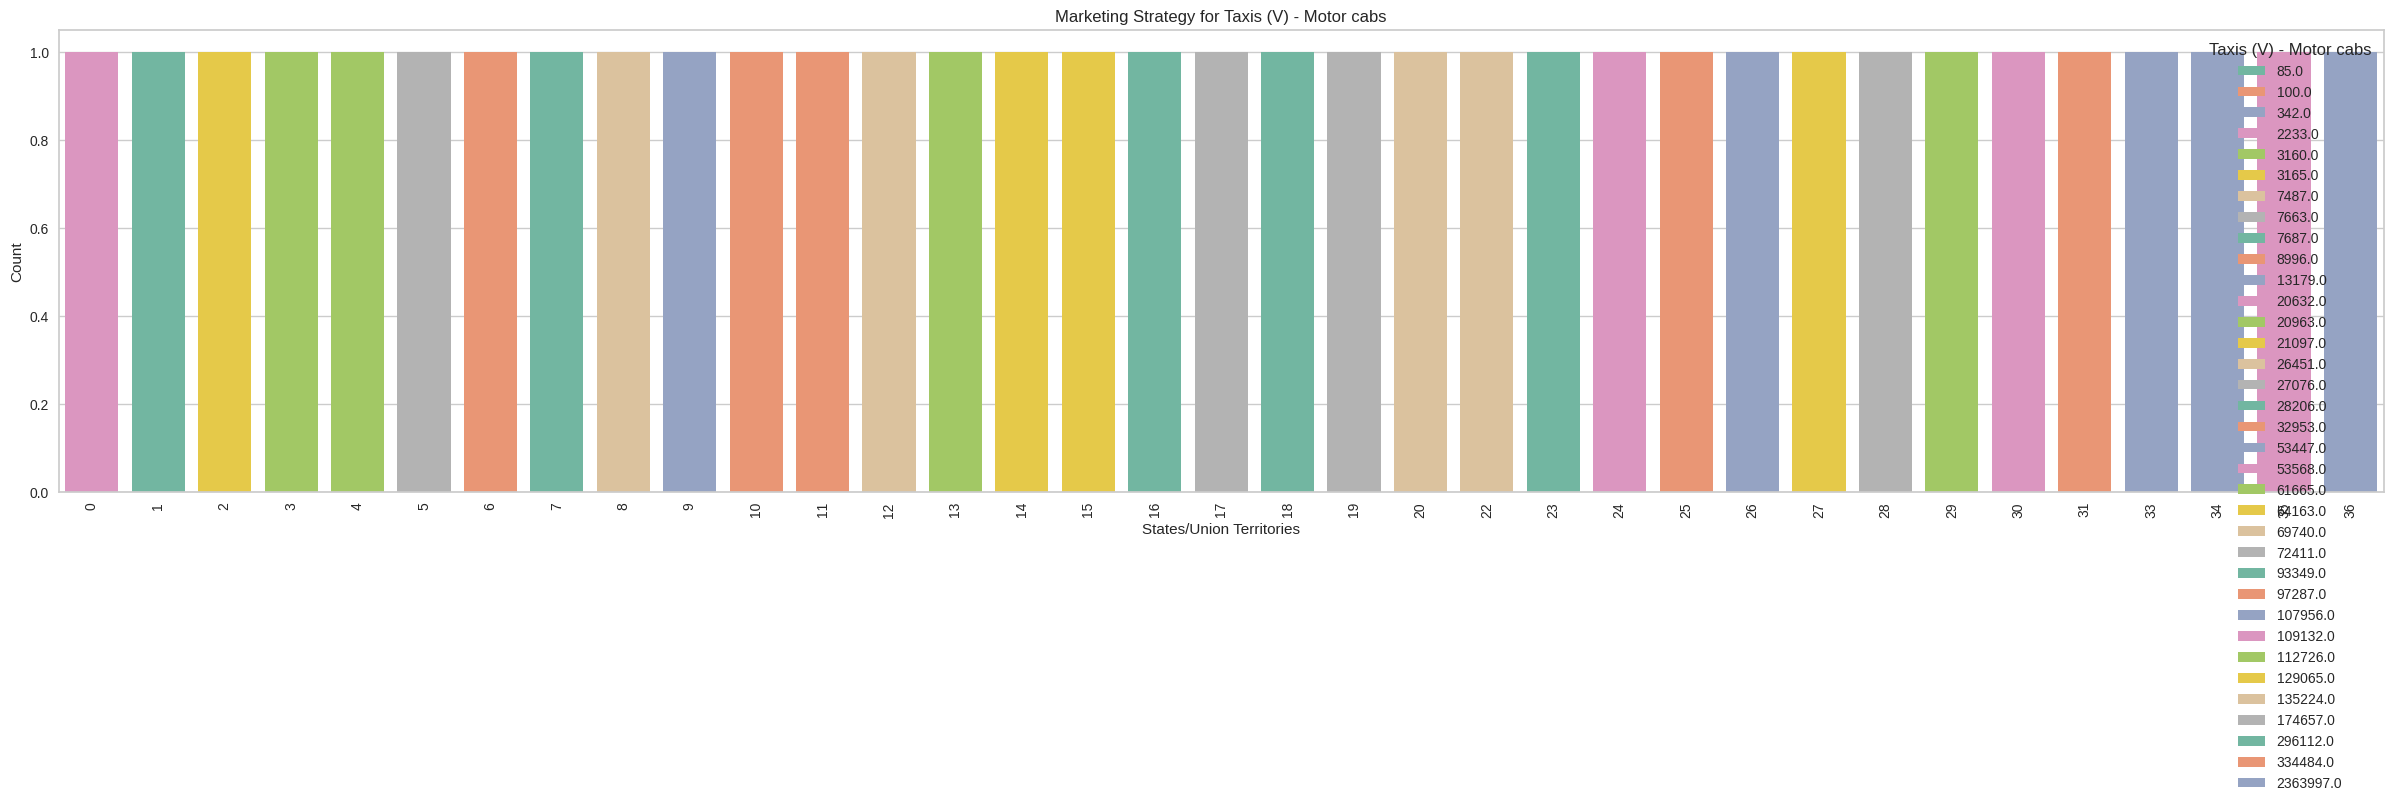

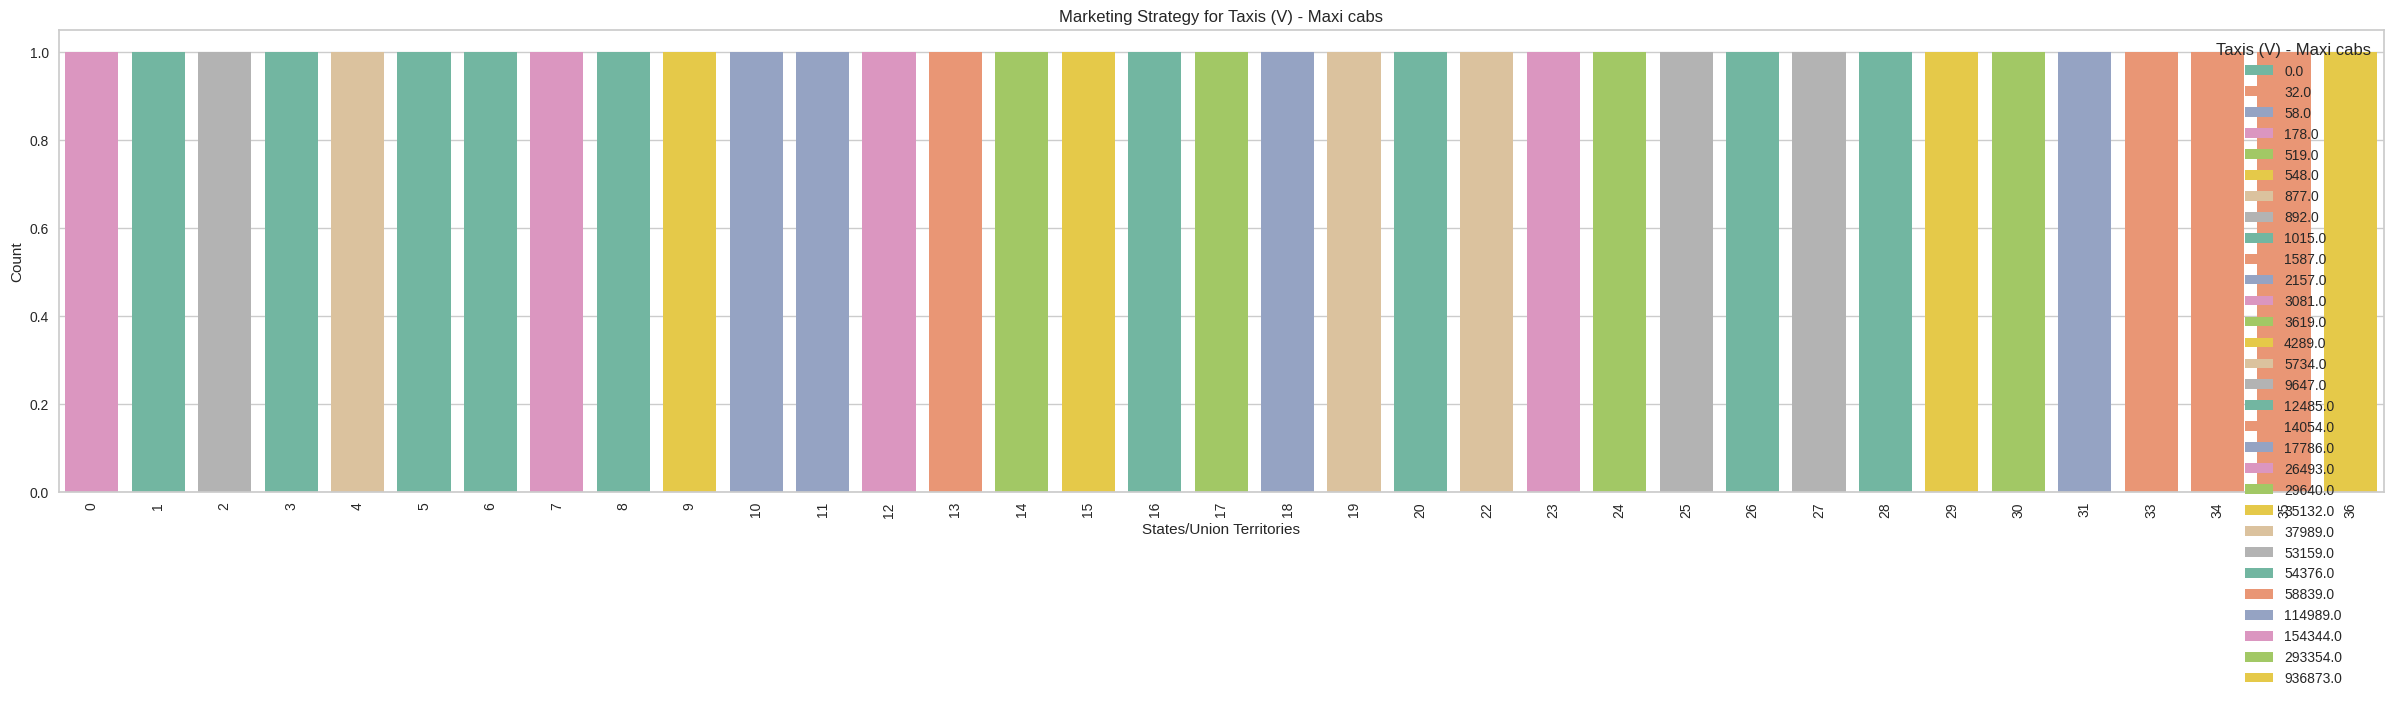

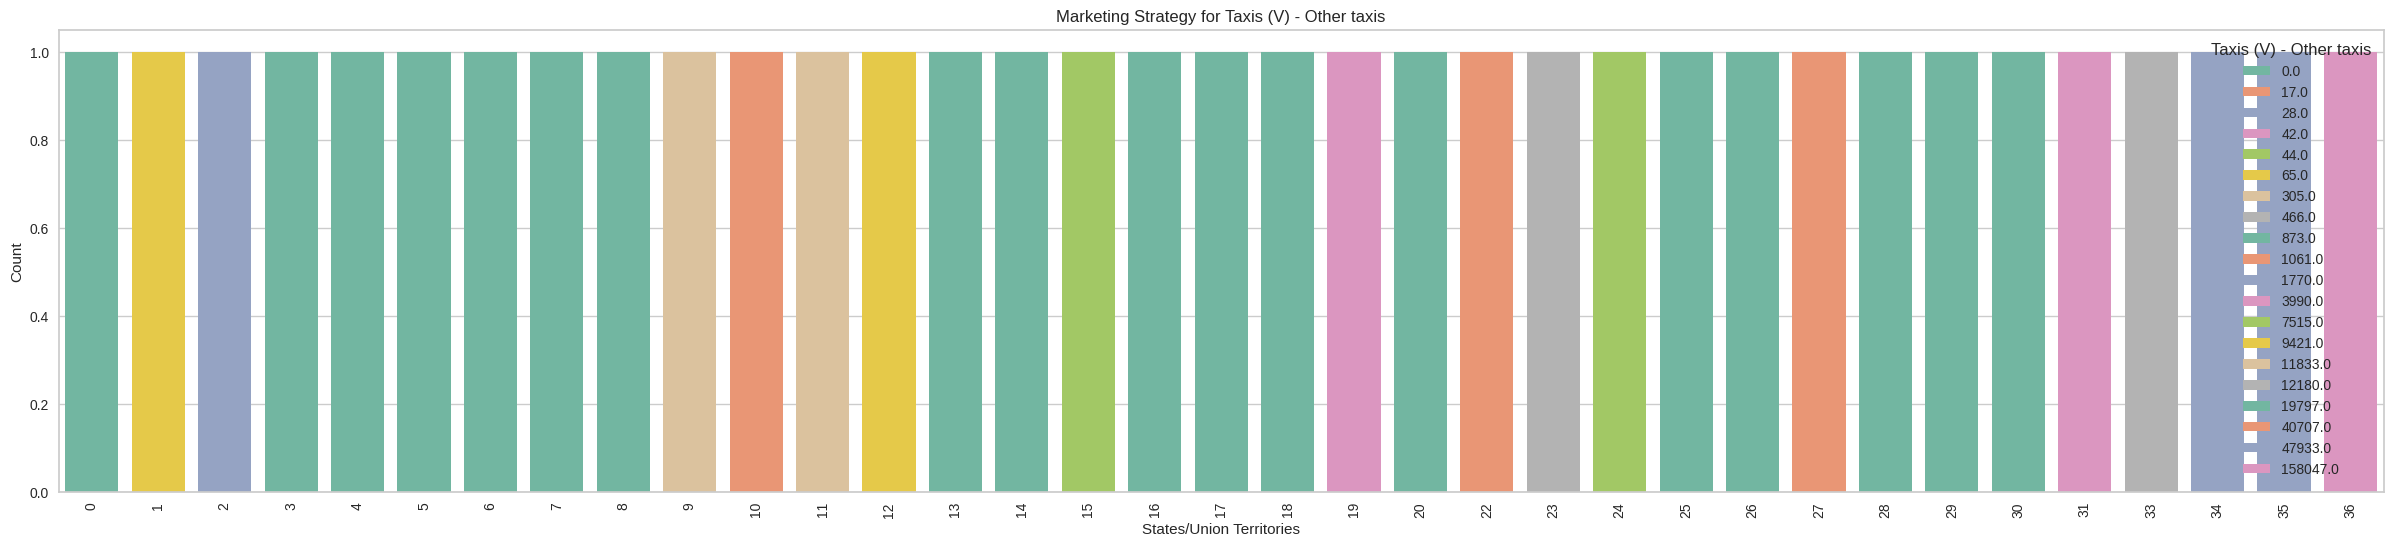

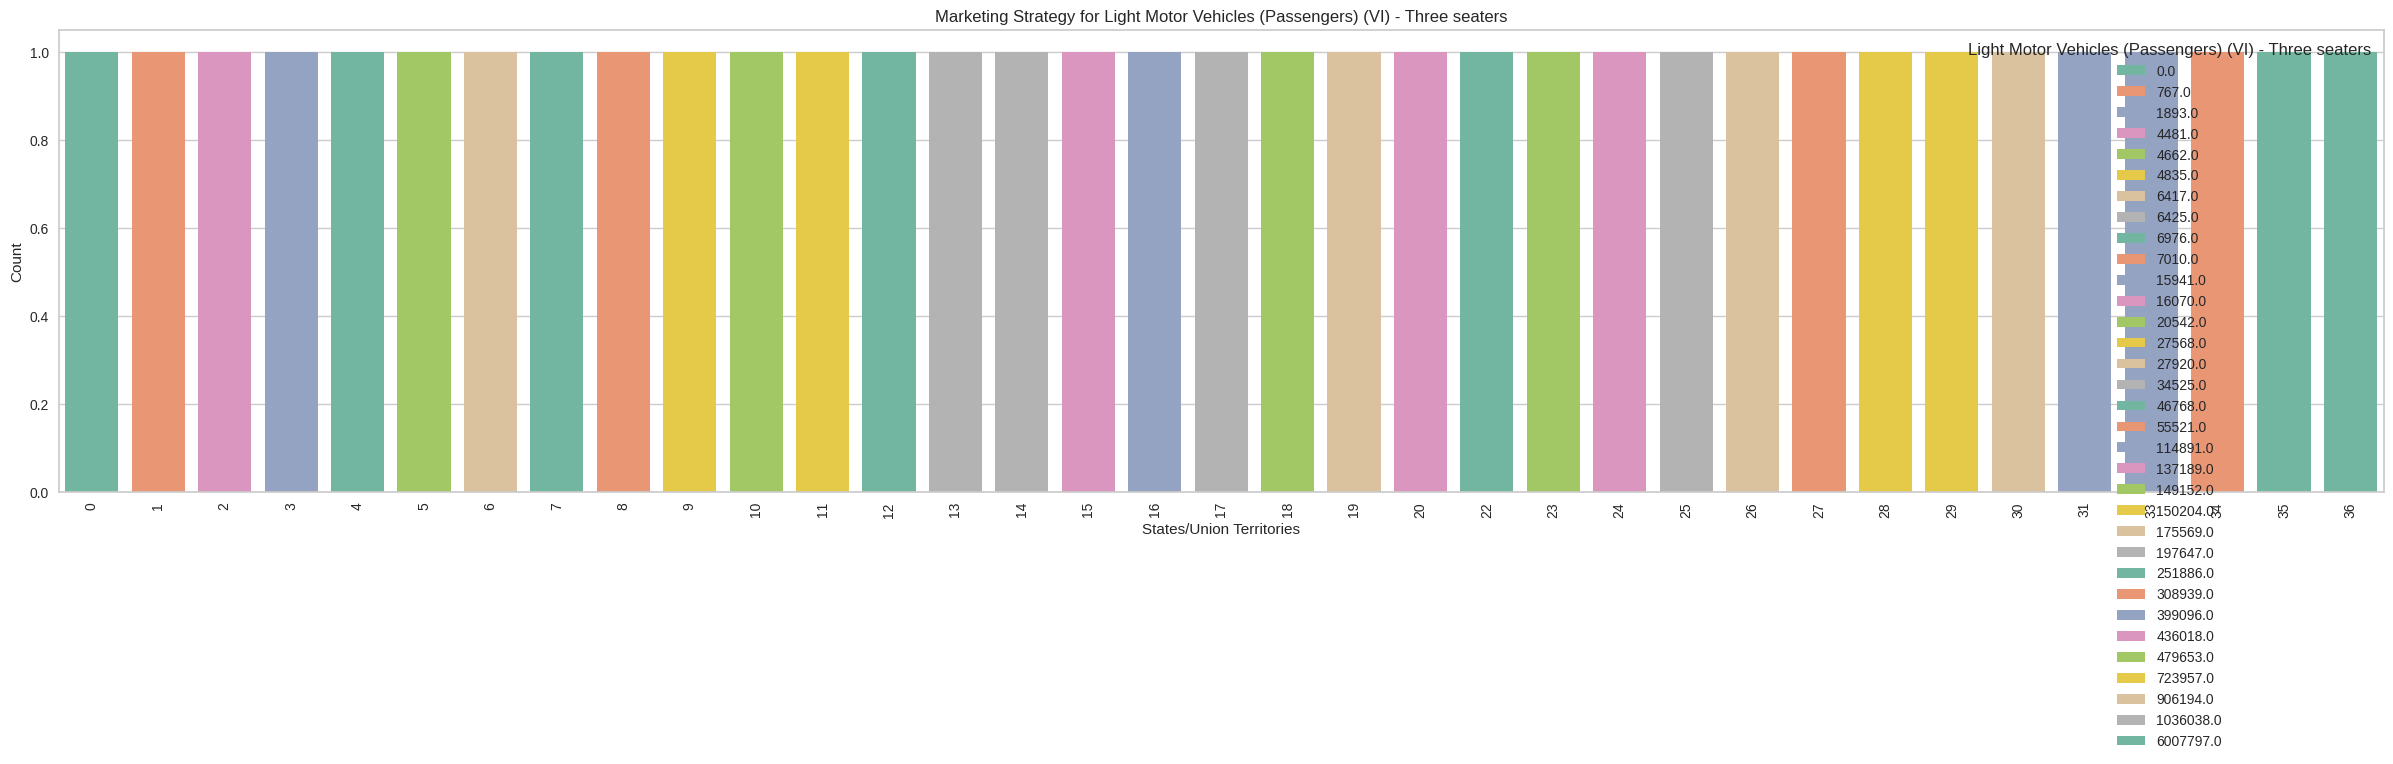

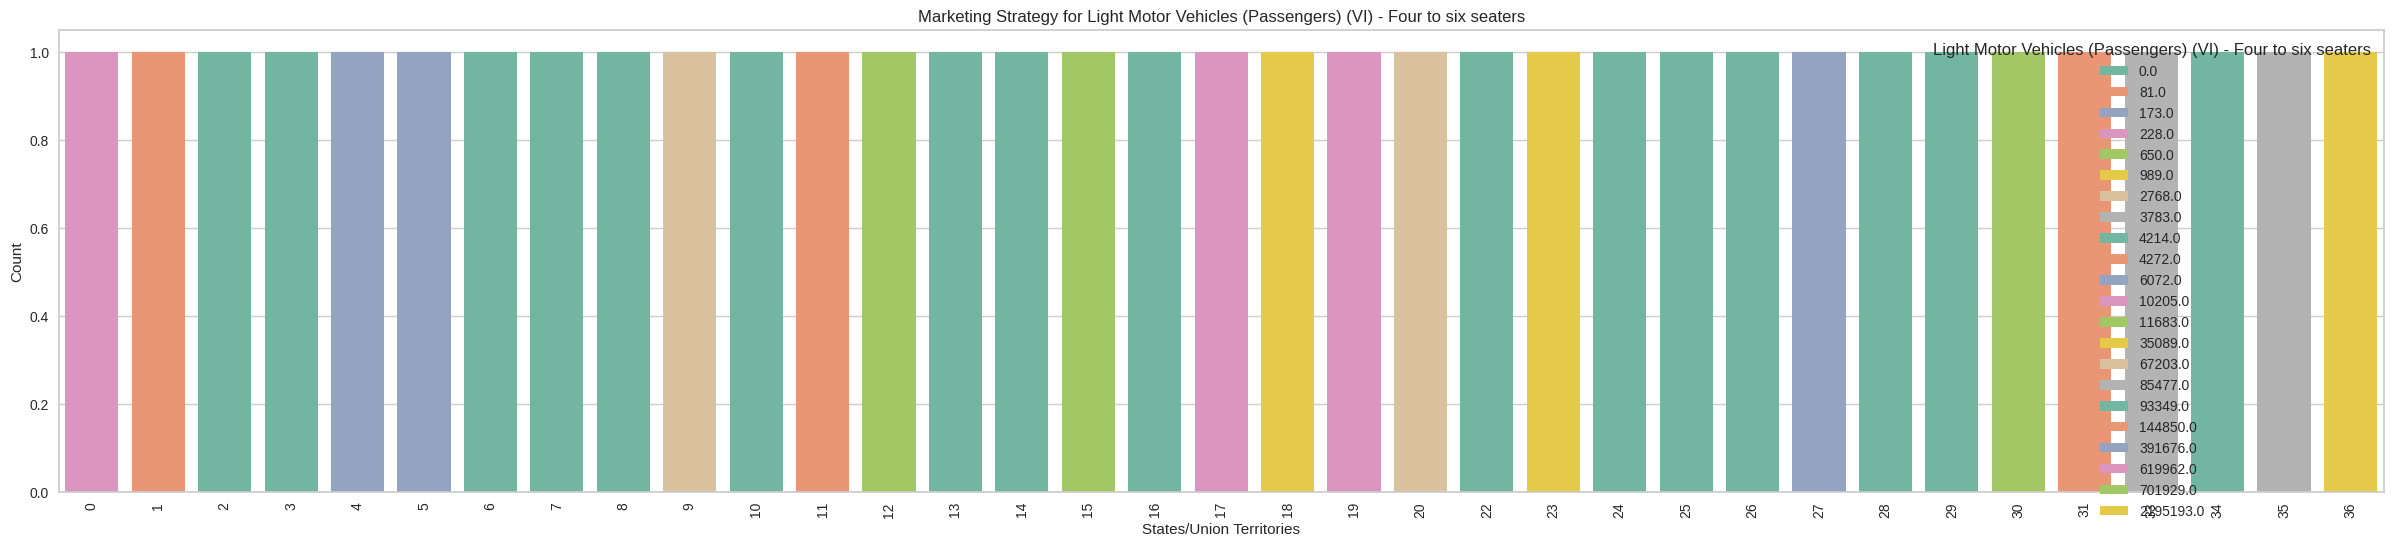

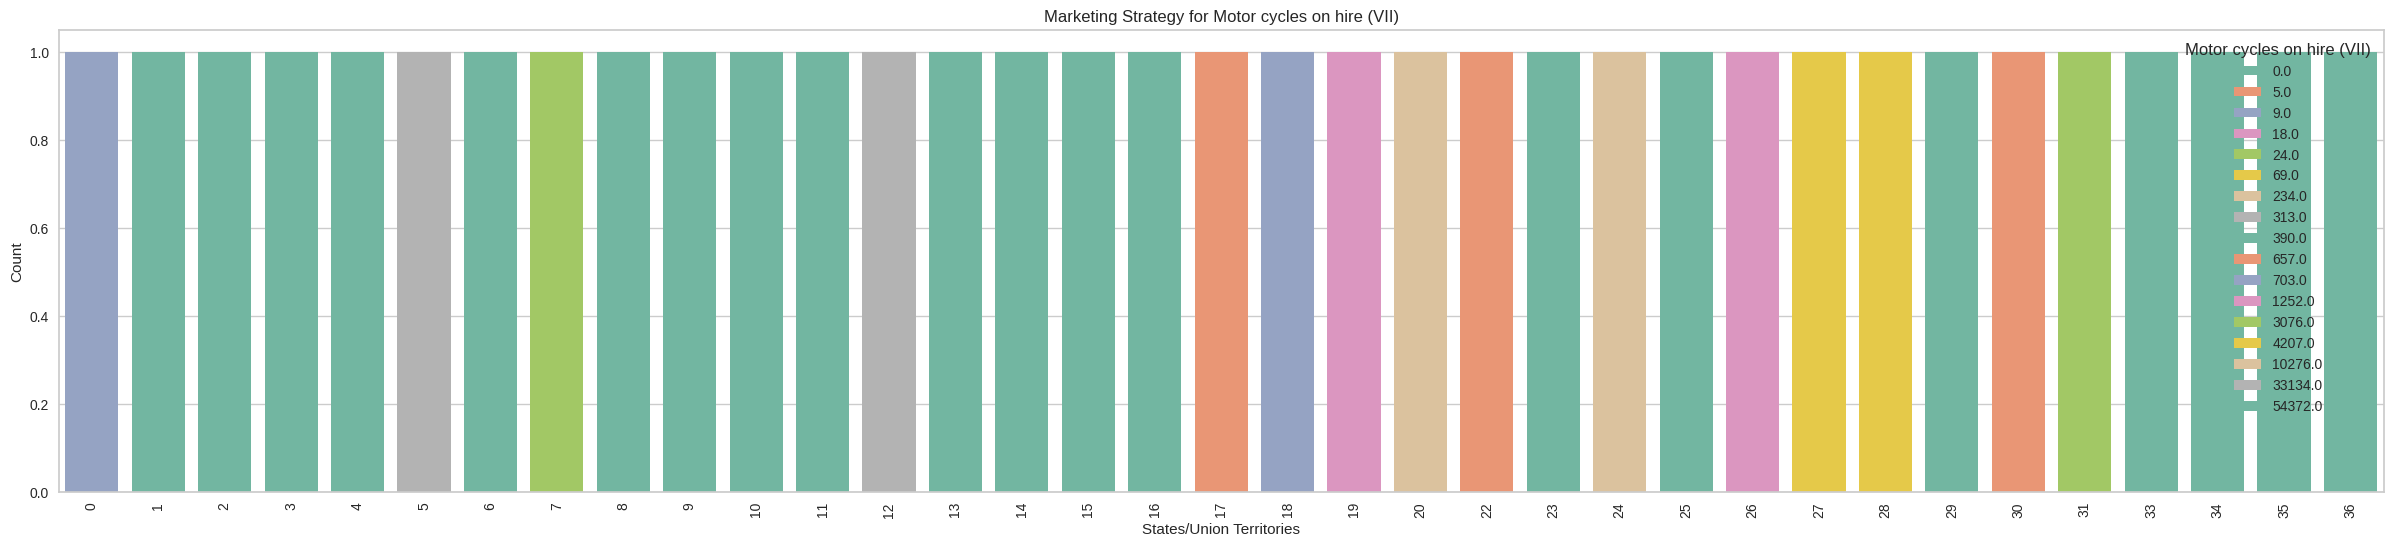

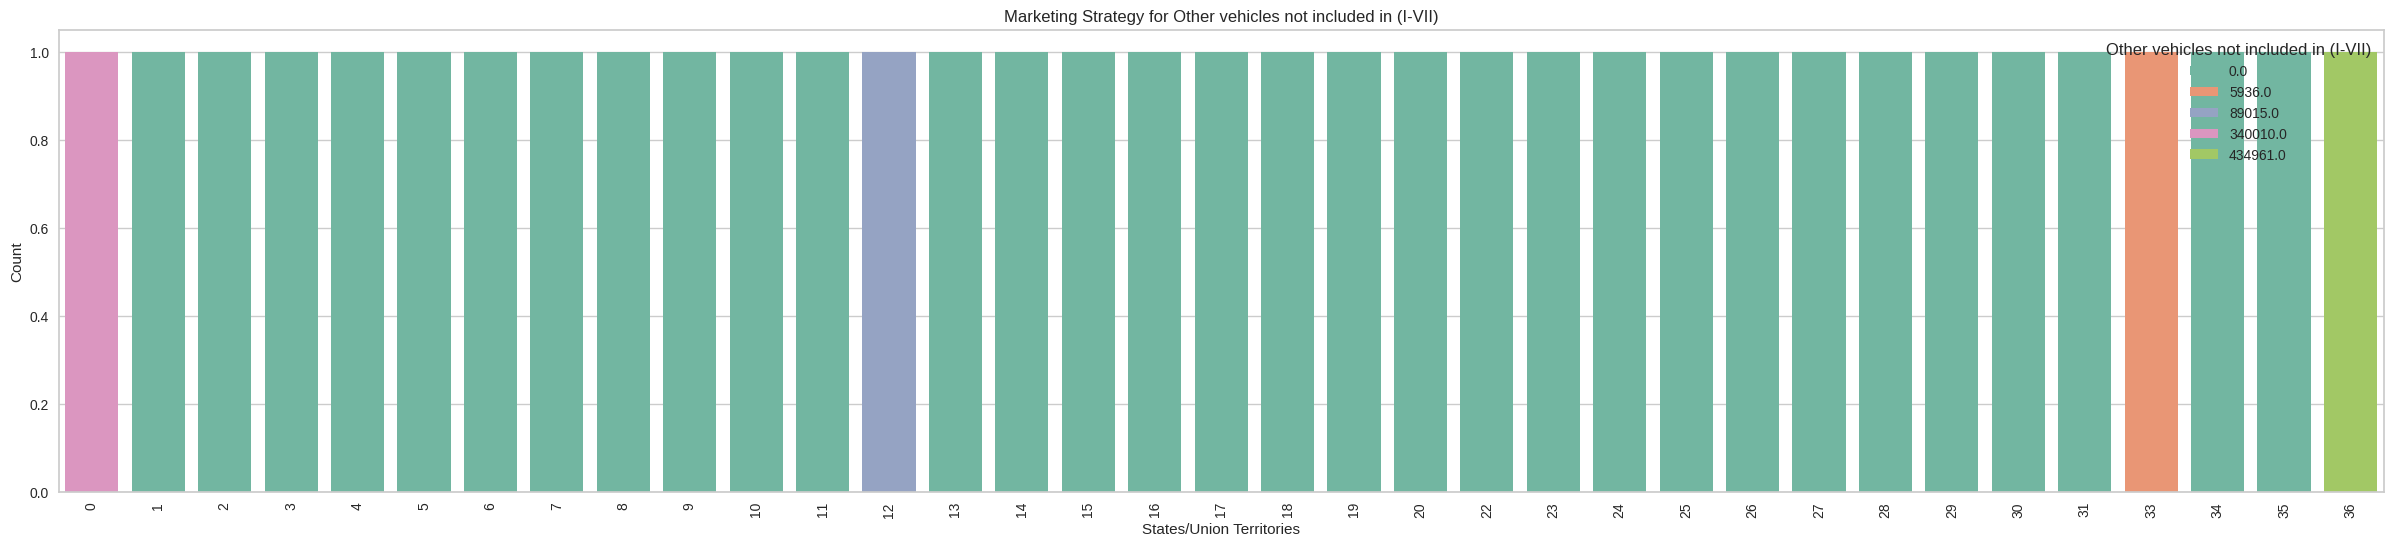

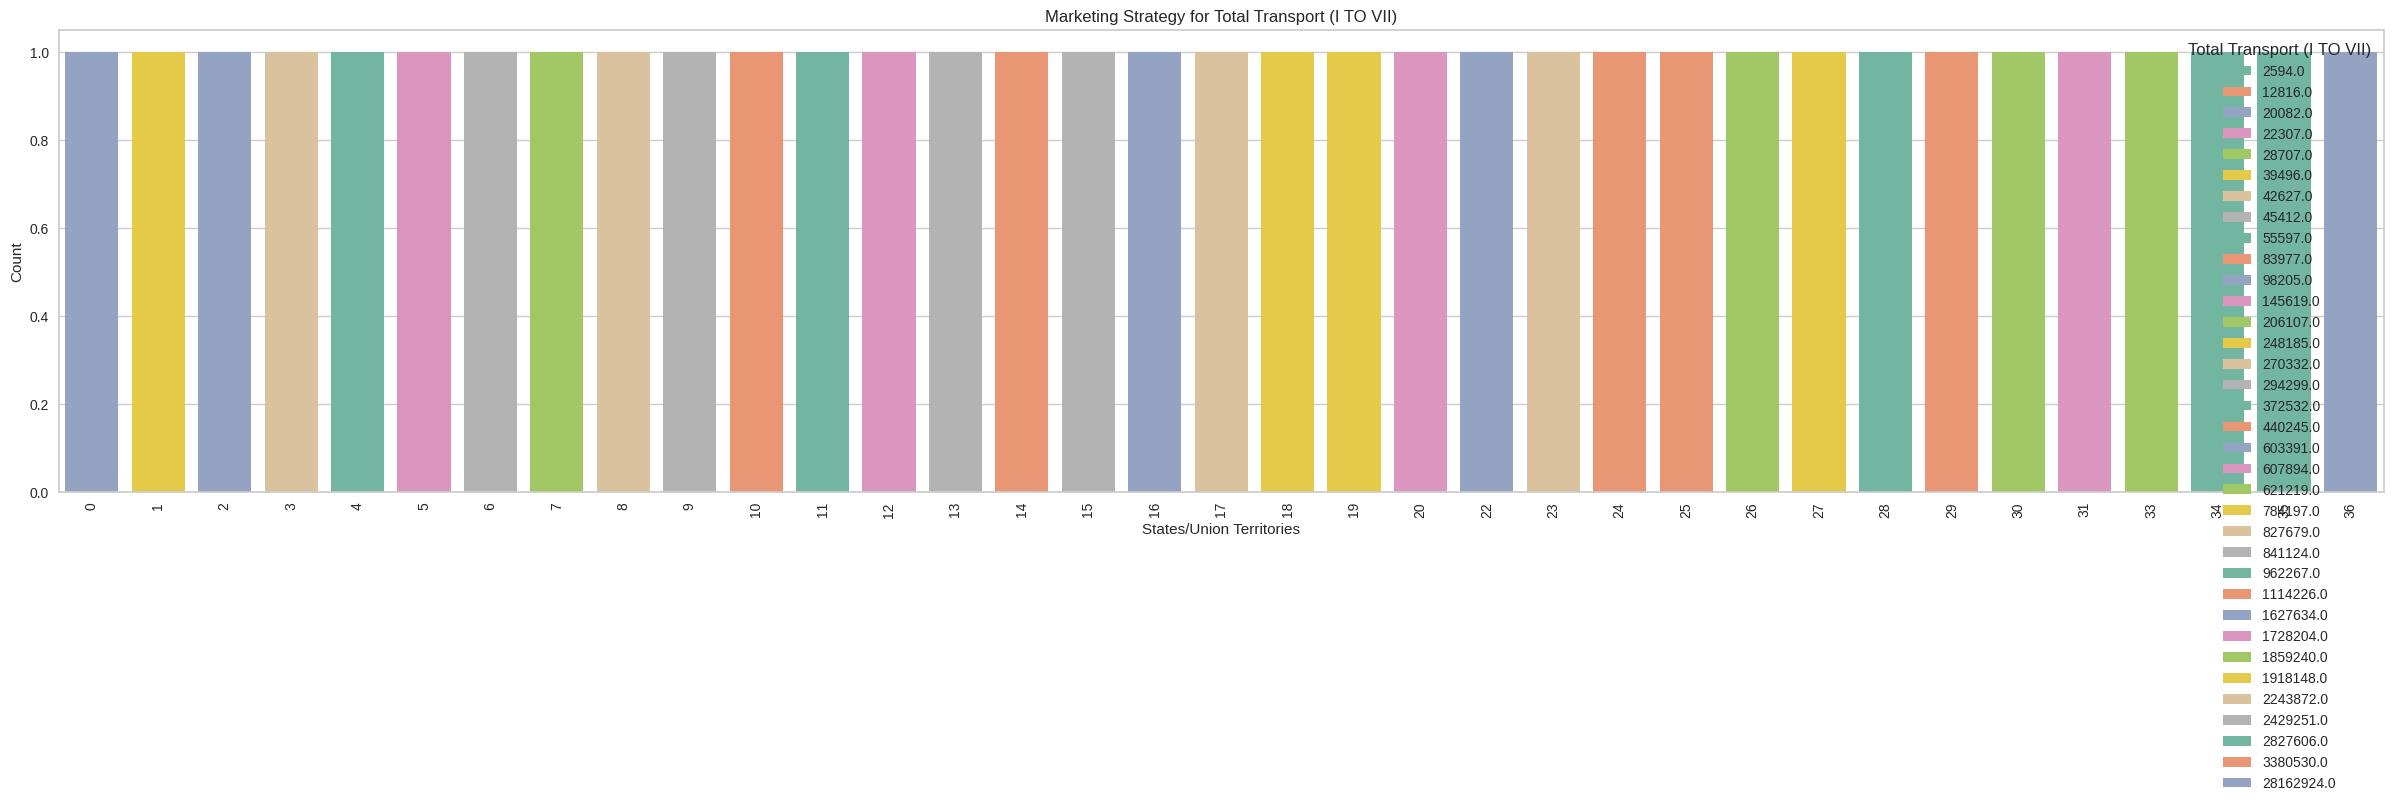

In [ ]:
# Define a function to plot the marketing strategy
def plot_marketing_strategy(vehicle_type, data):
    plt.figure(figsize=(30, 6))
    sns.countplot(x=data.index, hue=vehicle_type, data=data, palette='Set2')
    plt.title('Marketing Strategy for {}'.format(vehicle_type))
    plt.xlabel('States/Union Territories')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title=vehicle_type)
    plt.show()

# Targeting based on different vehicles
vehicle_types = ['Multiaxled/Articulated Vehicles (I)', 'Trucks and Lorries (II)',
                 'Light Motor Vehicles (Goods) (II) - Four Wheelers', 'Light Motor Vehicles (Goods) (II) - Three Wheelers',
                 'Buses (IV) - Stage carriages', 'Buses (IV) - Contract carriages', 'Buses (IV) - Private service vehicles',
                 'Buses (IV) - Other buses', 'Taxis (V) - Motor cabs', 'Taxis (V) - Maxi cabs', 'Taxis (V) - Other taxis',
                 'Light Motor Vehicles (Passengers) (VI) - Three seaters', 'Light Motor Vehicles (Passengers) (VI) - Four to six seaters',
                 'Motor cycles on hire (VII)', 'Other vehicles not included in (I-VII)', 'Total Transport (I TO VII)']

for vehicle_type in vehicle_types:
    plot_marketing_strategy(vehicle_type, data)


In [ ]:
# Analyze clusters
cluster_analysis = data.groupby('agglomerative_labels').mean()
print(cluster_analysis)



                      Multiaxled/Articulated Vehicles (I)  \
agglomerative_labels                                        
0                                            1.199884e+05   
1                                            1.632594e+06   
2                                            1.303008e+04   

                      Trucks and Lorries (II)  \
agglomerative_labels                            
0                                3.566873e+05   
1                                5.826471e+06   
2                                7.928796e+04   

                      Light Motor Vehicles (Goods) (II) - Four Wheelers  \
agglomerative_labels                                                      
0                                                          3.051133e+05   
1                                                          4.697352e+06   
2                                                          5.587942e+04   

                      Light Motor Vehicles (Goods) (II) - Three Wheelers

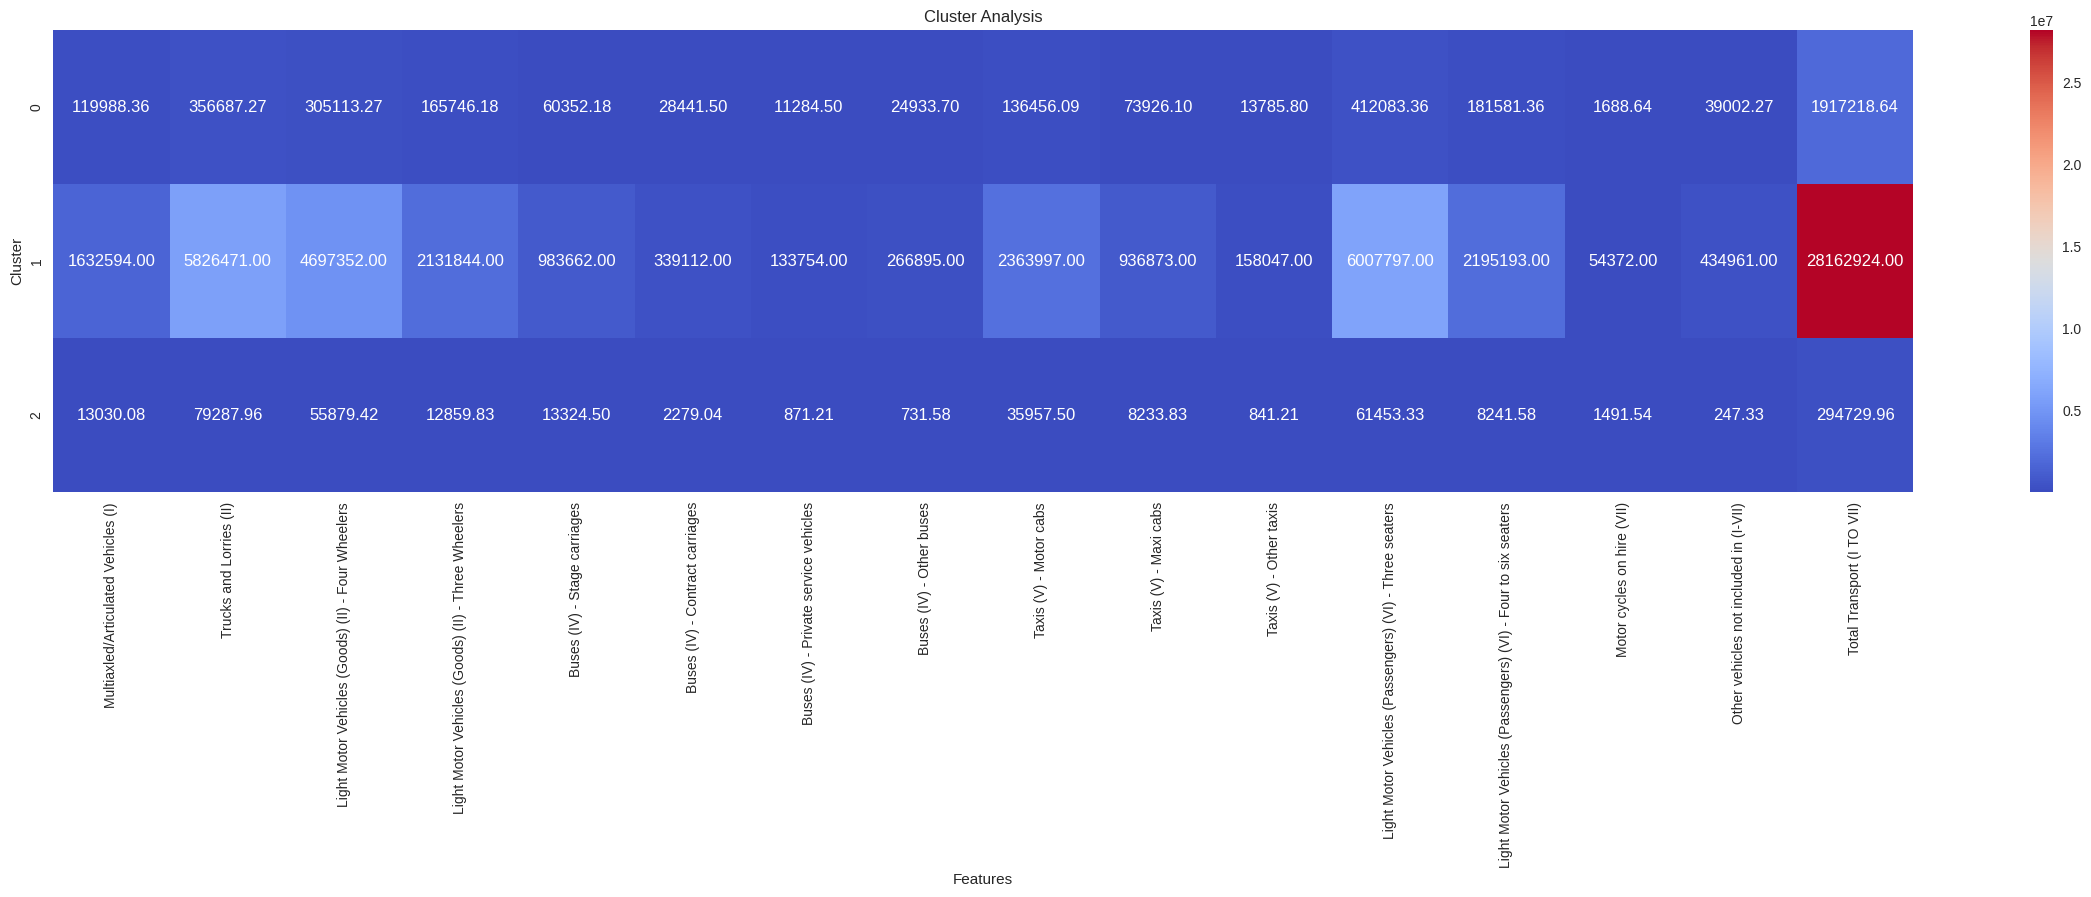

In [ ]:
# Visualize cluster analysis
plt.figure(figsize=(30, 6))
sns.heatmap(cluster_analysis, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Cluster Analysis')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()
